In [46]:
import numpy as np
import pandas as pd
import scanpy as sc
import sys
#sys.path.append("/ahg/regevdata/projects/Cell2CellCommunication/code/MIMOSCA")
import perturbseq as perturb

%matplotlib inline
import matplotlib.pyplot as plt


sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=200, color_map='viridis')
sc.logging.print_versions()
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

The `sinfo` package has changed name and is now called `session_info` to become more discoverable and self-explanatory. The `sinfo` PyPI package will be kept around to avoid breaking old installs and you can downgrade to 0.3.2 if you want to use it without seeing this message. For the latest features and bug fixes, please install `session_info` instead. The usage and defaults also changed slightly, so please review the latest README at https://gitlab.com/joelostblom/session_info.
-----
anndata     0.7.6
scanpy      1.7.2
sinfo       0.3.4
-----
PIL                 8.2.0
anyio               NA
appnope             0.1.2
attr                20.3.0
babel               2.9.0
backcall            0.2.0
bottleneck          1.3.2
brotli              NA
cairo               1.20.1
certifi             2020.12.05
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.6.0
colorama            0.4.4
cycler              0.10.0
cython_runtime      NA
cytoolz             0.11.0
dask  

In [47]:
OUT='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'
FIGS=OUT

In [48]:
#density embeddings
#bring the atac counts and LSI
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/atac1.highqcells.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.LSI.csv'
cell2lsi=pd.read_csv(f,sep='\t')

In [49]:
cell2lsi.shape

(2383, 50)

In [50]:
lsadata=sc.AnnData(cell2lsi.iloc[:,1:31])
lsadata

AnnData object with n_obs × n_vars = 2383 × 30

In [51]:
#add the ko label
ko=[]
reps=[]
el_names=list(cell2lsi.index)
for i in range(lsadata.n_obs):
    el_name=el_names[i]
    items=el_name.split(',')[3].split('_')
    ko_here=items[0]
    rep_here=items[1]
    ko.append(ko_here)
    reps.append(items[0]+'_'+items[1])
    
lsadata.obs['ko']=ko
lsadata.obs['rep']=reps

In [52]:
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.umap.csv'
umap_r=pd.read_csv(f,sep='\t')
umap_r.head()

,UMAP_1,UMAP_2
"R1.30,R2.68,R3.88,ARID1A_rep2",-1.393302,0.137543
"R1.78,R2.87,R3.52,BRD9_rep2",3.483831,-1.384405
"R1.30,R2.96,R3.61,ARID1A_rep2",4.838845,-2.304625
"R1.44,R2.64,R3.87,SMARCA4_rep2",-2.535998,2.361482
"R1.32,R2.03,R3.05,ARID1A_rep2",-0.982391,1.051928


In [53]:
lsadata.obsm['X_umap']=np.array(umap_r.loc[lsadata.obs_names,:])

In [54]:
sc.tl.embedding_density(lsadata, basis='umap', groupby='ko')

... storing 'ko' as categorical
... storing 'rep' as categorical
computing density on 'umap'
--> added
    'umap_density_ko', densities (adata.obs)
    'umap_density_ko_params', parameter (adata.uns)


In [10]:
sc.set_figure_params(figsize=(5,5))
sc.settings.figdir=OUT

/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1186: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_over('black')
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/__init__.py:1187: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. In future versions, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = copy.copy(mpl.cm.get_cmap("YlOrRd"))
  color_map.set_under('lightgray')
/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/plotting/_tools/scatterplots.py:364: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously

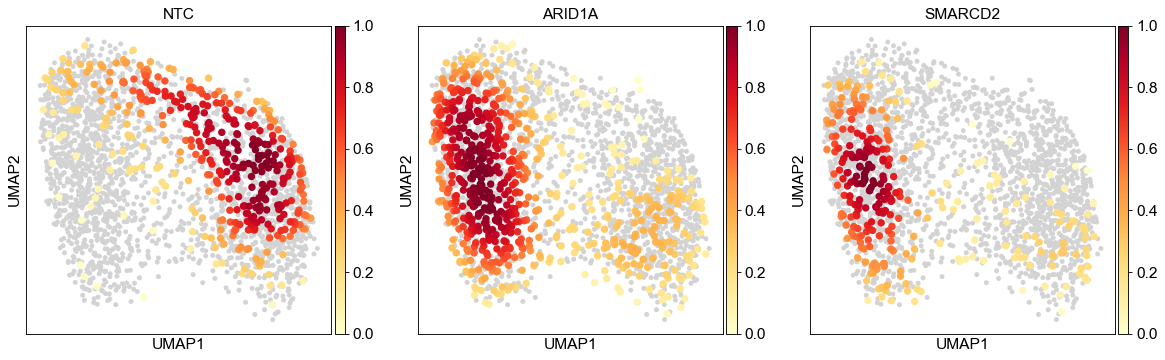

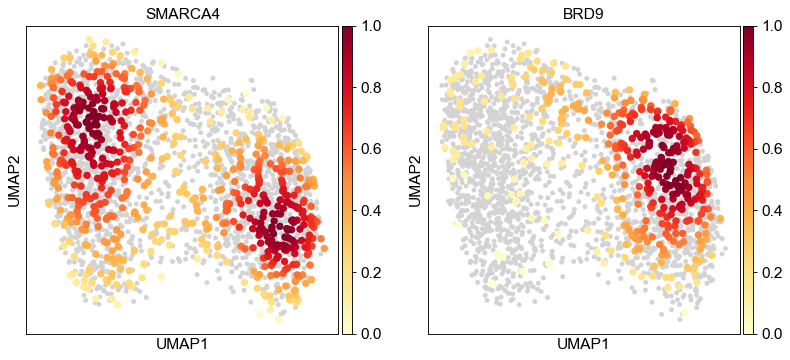

In [11]:
sc.pl.embedding_density(lsadata, basis='umap', key='umap_density_ko',
                        group=['NTC','ARID1A','SMARCD2'],ncols=3,
                       save='LSI.densities1.pdf')
sc.pl.embedding_density(lsadata, basis='umap', key='umap_density_ko',
                        group=['SMARCA4','BRD9'],ncols=2,
                       save='LSI.densities2.pdf')

In [12]:
DATA='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/atac1.highqcells.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.'
features=pd.read_csv(DATA+'cell_features.csv',sep='\t')

In [13]:
lsadata.obs['seurat_clusters']=features.loc[lsadata.obs_names,'seurat_clusters']
s2=[]
for i in range(lsadata.shape[0]):
    s1=lsadata.obs['seurat_clusters'][i]
    s2.append(str(s1))
lsadata.obs['seurat_clusters.cat']=s2

... storing 'seurat_clusters.cat' as categorical


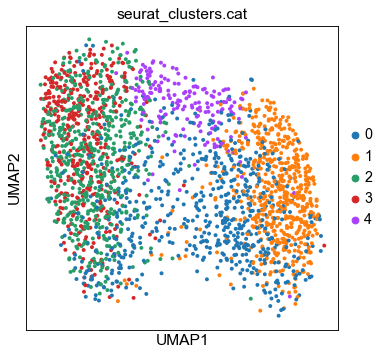

In [14]:
sc.pl.umap(lsadata,color='seurat_clusters.cat',save='LSI.seurat_clusters.pdf')

In [15]:
features.columns

Index(['orig.ident', 'nCount_peaks', 'nFeature_peaks', 'CB', 'frequency_count',
       'mononucleosomal', 'nucleosome_free', 'reads_count', 'FRiP', 'label',
       'ko', 'rep', 'nucleosome_signal', 'nucleosome_percentile',
       'TSS.enrichment', 'TSS.percentile', 'peaks_snn_res.0.8',
       'seurat_clusters', 'nCount_activity', 'nFeature_activity'],
      dtype='object')

In [16]:
DATA='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'
elts=pd.read_csv(DATA+'element_scoresFRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.csv',sep='\t')
elts.head()

,cBAF,ncBAF,PBAF,loops,PROMOTERS,cBAF.ncBAF.PBAF,cBAF.ncBAF,ncBAF.PBAF,cBAF.PBAF,cBAFonly,...,cBAFonly..tss.,cBAFonly..distal.,ncBAFonly..tss.,ncBAFonly..distal.,PBAFonly..tss.,PBAFonly..distal.,not.bound.by.BAF..tss.,not.bound.by.BAF..distal.,ko,nCount_peaks
"R1.30,R2.68,R3.88,ARID1A_rep2",-0.092614,0.505936,0.267852,0.172541,-0.297952,0.455316,-0.073474,-0.184262,0.029401,-1.824901,...,-1.354132,-1.337713,0.236015,1.216526,-0.684659,0.796641,-2.491580,-0.121358,ARID1A,9220
"R1.78,R2.87,R3.52,BRD9_rep2",0.508958,-0.327658,0.528044,-1.408915,0.370756,-0.405215,0.185964,1.404166,1.879720,-0.252307,...,-0.171534,-0.215058,-0.232766,-2.241024,-1.495286,-0.815118,-0.539460,-0.498491,BRD9,734
"R1.30,R2.96,R3.61,ARID1A_rep2",-0.642309,-0.617543,-0.443798,0.156851,0.270800,-0.270878,-1.123456,0.544973,-0.254310,-0.211301,...,0.927918,-0.753849,-0.877181,-1.041924,-0.219576,-1.226893,-0.193297,3.114313,ARID1A,6086
"R1.44,R2.64,R3.87,SMARCA4_rep2",0.798720,-0.111853,-0.284460,-0.593732,-0.362553,0.256939,0.927794,-1.592352,0.462431,0.542774,...,-0.044443,0.662317,-1.218458,0.648998,-0.054276,-1.474749,-0.544531,0.776059,SMARCA4,2176
"R1.32,R2.03,R3.05,ARID1A_rep2",-0.716632,0.872285,0.576963,1.153404,-0.375050,0.466393,-0.889023,1.734013,-0.300386,-2.163736,...,-1.159469,-1.882582,0.231836,0.873876,-0.975350,1.273168,-1.563054,0.555721,ARID1A,6336


In [17]:
elts.shape

(2383, 40)

In [18]:
for c in elts.columns:
    lsadata.obs[c]=elts[c]

... storing 'ko' as categorical


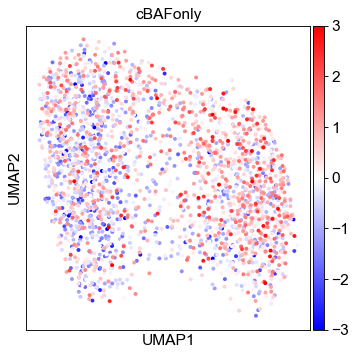

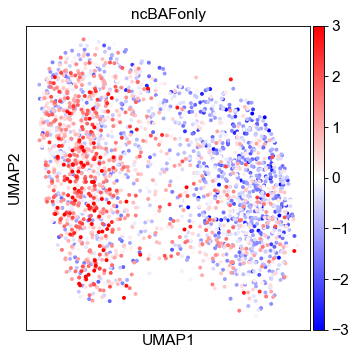

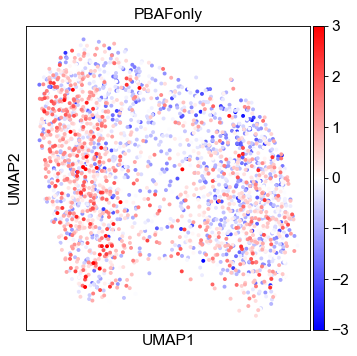

In [19]:
sc.set_figure_params(figsize=(5,5))
x=3
sc.pl.umap(lsadata,color=['cBAFonly'],cmap='bwr',ncols=1,
          vmin=-x,vmax=x,save='complex_scores.cBAFonly.pdf')
sc.pl.umap(lsadata,color=['ncBAFonly'],cmap='bwr',ncols=1,
          vmin=-x,vmax=x,save='complex_scores.ncBAFonly.pdf')
sc.pl.umap(lsadata,color=['PBAFonly'],cmap='bwr',ncols=1,
          vmin=-x,vmax=x,save='complex_scores.PBAFonly.pdf')

In [94]:
#also bring the RNA
DATA='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/'

atac_mapping=pd.read_csv(DATA+'.jordan.atac_cellname_map.csv')
atac_mapping.index=atac_mapping.loc[:,'old_name']

#now, read in share rna

# load the RNA and ATAC data
rnapath=DATA+'jordan.rna.hg19.UMIcounts.csv.gz'
fragpath=DATA+'jordan.atac.hg19.rmdup.cutoff.labelnames.bed.gz'


arata=sc.read(DATA+'.RNA.filtered.h5ad')
arata

AnnData object with n_obs × n_vars = 3073 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [95]:
arata=arata[arata.obs['total_counts']>2000,:]
arata

View of AnnData object with n_obs × n_vars = 1079 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [96]:
rna_labels=pd.read_csv(DATA+'.jordan.rna_cellname_map.csv')
rna_labels.index=rna_labels['old_name']
rna_labels.head()

common=list(set(arata.obs_names).intersection(set(list(rna_labels.index))))
print(len(common))

arata.obs['sample']=rna_labels.loc[arata.obs_names,'label']
ko=[]
for i in range(arata.n_obs):
    ko.append(arata.obs['sample'][i].split('_')[0])
arata.obs['ko']=ko

arata.obs_names=rna_labels.loc[arata.obs_names,'new_name']

Trying to set attribute `.obs` of view, copying.


1079


In [97]:
common=list(set(arata.obs_names).intersection(set(cell2lsi.index)))
print(len(common))

1044


In [98]:
arata2=arata[common,:]
arata2

View of AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [99]:
sc.pp.scale(arata2,max_value=10)

/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [100]:
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'

In [26]:
cell2lsi2=cell2lsi.loc[common,]

In [27]:
for c in ['cBAFonly','ncBAFonly','PBAFonly']:
    arata2.obs[c]=elts.loc[arata2.obs_names,c]

In [28]:
cell_colors=pd.DataFrame({'color':'white'},index=common)
cell_colors.loc[arata2[common,:].obs['ko'].isin(['ARID1A','SMARCD2']),'color']='blue'
cell_colors.loc[arata2[common,:].obs['ko'].isin(['SMARCA4']),'color']='lightgray'
cell_colors.loc[arata2[common,:].obs['ko'].isin(['BRD9']),'color']='green'
cell_colors.loc[arata2[common,:].obs['ko'].isin(['NTC']),'color']='orange'



In [29]:
OUT

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'

In [30]:
cell_colors2=pd.DataFrame({'color':'white'},index=lsadata.obs_names)
cell_colors2.loc[lsadata.obs['ko'].isin(['ARID1A','SMARCD2']),'color']='blue'
cell_colors2.loc[lsadata.obs['ko'].isin(['SMARCA4']),'color']='lightgray'
cell_colors2.loc[lsadata.obs['ko'].isin(['BRD9']),'color']='green'
cell_colors2.loc[lsadata.obs['ko'].isin(['NTC']),'color']='orange'

blue
orange
green
lightgray


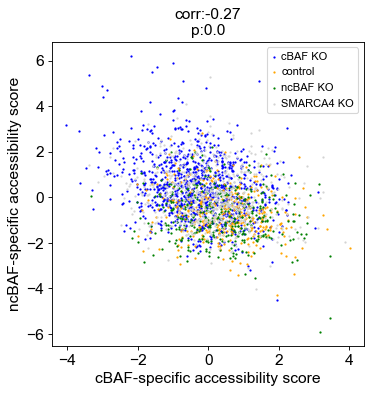

In [31]:
dd={'blue':'cBAF KO','green':'ncBAF KO','lightgray':'SMARCA4 KO','orange':'control'}

for colo in set(cell_colors2.loc[lsadata.obs_names]['color']):
    print(colo)
    
    cells_here=lsadata.obs_names[cell_colors2.loc[lsadata.obs_names]['color']==colo]

    plt.scatter(lsadata.obs['cBAFonly'].loc[cells_here],lsadata.obs['ncBAFonly'].loc[cells_here],
                c=colo,
                label=dd[colo],
                s=1,
                #alpha=0.5,
               )
    from scipy.stats import spearmanr

    sp,p=spearmanr(lsadata.obs['cBAFonly'],lsadata.obs['ncBAFonly'])
    plt.title('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))
    plt.xlabel('cBAF-specific accessibility score')
    plt.ylabel('ncBAF-specific accessibility score')

    plt.grid(False)
plt.legend(fontsize=10,loc='upper right')
plt.savefig(OUT+'cbaf_ncbaf.triangle2.pdf',transparent=True)

blue
orange
green
lightgray


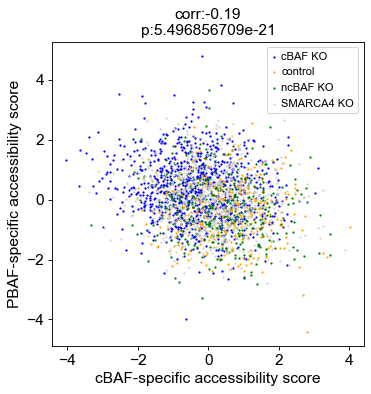

In [33]:
dd={'blue':'cBAF KO','green':'ncBAF KO','lightgray':'SMARCA4 KO','orange':'control'}

for colo in set(cell_colors2.loc[lsadata.obs_names]['color']):
    print(colo)
    
    cells_here=lsadata.obs_names[cell_colors2.loc[lsadata.obs_names]['color']==colo]

    plt.scatter(lsadata.obs['cBAFonly'].loc[cells_here],lsadata.obs['PBAFonly'].loc[cells_here],
                c=colo,
                label=dd[colo],
                s=1,
                #alpha=0.5,
               )
    from scipy.stats import spearmanr

    sp,p=spearmanr(lsadata.obs['cBAFonly'],lsadata.obs['PBAFonly'])
    plt.title('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))
    plt.xlabel('cBAF-specific accessibility score')
    plt.ylabel('PBAF-specific accessibility score')

    plt.grid(False)
plt.legend(fontsize=10,loc='upper right')
plt.savefig(OUT+'cbaf_pbaf.triangle2.pdf',transparent=True)

In [34]:
ctrl_cells=list(cell_colors.loc[cell_colors['color']=='orange',:].index)

from scipy.stats import spearmanr

sp,p=spearmanr(arata2.obs['cBAFonly'].loc[ctrl_cells],
               arata2.obs['ncBAFonly'].loc[ctrl_cells])
print('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))


corr:-0.2
p:0.0015754575299970698


In [35]:
ctrl_cells=list(cell_colors.loc[cell_colors['color']=='orange',:].index)

from scipy.stats import spearmanr

sp,p=spearmanr(arata2.obs['cBAFonly'].loc[ctrl_cells],
               arata2.obs['PBAFonly'].loc[ctrl_cells])
print('corr:'+str(np.round(sp,2))+'\np:'+str(np.round(p,30)))


corr:-0.11
p:0.0988920882475557


p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NTC v.s. ARID1A: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=2.415e-31 U_stat=1.946e+05
NTC v.s. SMARCD2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.317e-11 U_stat=7.666e+04
NTC v.s. SMARCA4: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=4.444e-08 U_stat=1.480e+05
NTC v.s. BRD9: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.701e-01 U_stat=8.055e+04
p-value annotation legend:
ns: 5.00e-02 < p <= 1.00e+00
*: 1.00e-02 < p <= 5.00e-02
**: 1.00e-03 < p <= 1.00e-02
***: 1.00e-04 < p <= 1.00e-03
****: p <= 1.00e-04

NTC v.s. ARID1A: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=3.160e-33 U_stat=7.596e+04
NTC v.s. SMARCD2: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val=1.187e-4

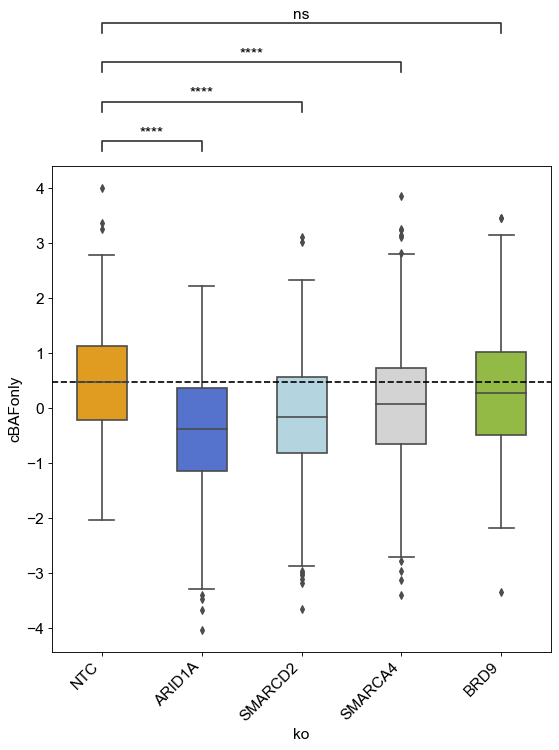

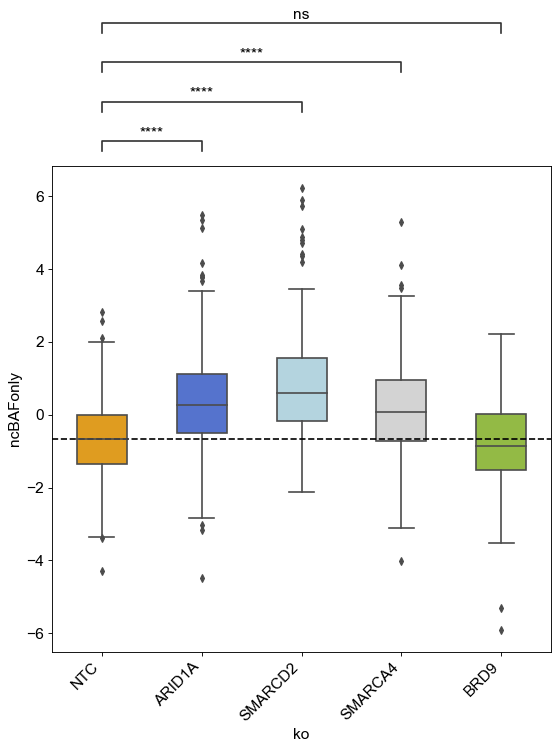

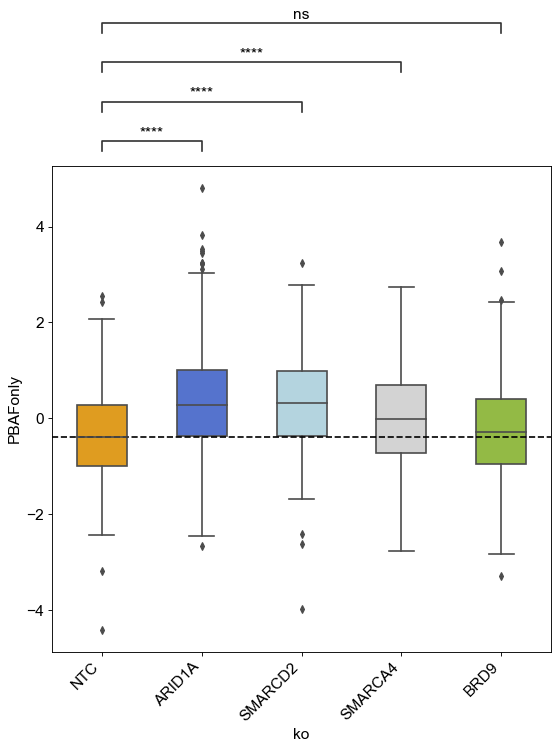

In [36]:
#score boxplots
import seaborn as sns
from statannot import add_stat_annotation

for peaktype in ['cBAFonly','ncBAFonly','PBAFonly']:

    palette={'NTC':'orange','ARID1A':'royalblue',
                       'SMARCD2':'lightblue','SMARCA4':'lightgray','BRD9':'yellowgreen'}

    fig,plots=plt.subplots(1)
    fig.set_size_inches(8,8)

    sns.boxplot(data=lsadata.obs,x='ko',y=peaktype,
               order=['NTC','ARID1A','SMARCD2','SMARCA4','BRD9'],
               palette=palette,ax=plots,width=0.5)
    median_ntc=np.median(lsadata.obs.loc[lsadata.obs['ko']=='NTC',peaktype])
    plt.axhline(y=median_ntc,linestyle='--',color='black')
    plt.grid(False)
    plots.set_xticklabels(plots.get_xticklabels(),rotation=45,ha="right")


    box_pairs=[('NTC','ARID1A'),
               ('NTC','SMARCD2'),
               ('NTC','SMARCA4'),
               ('NTC','BRD9'),
              ]
    a=add_stat_annotation(plots,data=lsadata.obs,x='ko',y=peaktype,
                        box_pairs=box_pairs,order=['NTC','ARID1A','SMARCD2','SMARCA4','BRD9'],
                        test='Mann-Whitney', loc='outside',verbose=2)
    plt.savefig(OUT+peaktype+'.boxplots.pdf',transparent=True,bbox_inches='tight')

In [37]:
#bring in gene programa from the single dataset
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
pref=DATA+'/Baf.single_gene'
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [38]:
arata

AnnData object with n_obs × n_vars = 1079 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [39]:
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'

In [40]:
adata

AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [41]:
genes_compare=list(set(adata.var_names).intersection(set(arata2.var_names)))
len(genes_compare)

1121

In [15]:
def subtract_columns_mean(dataset,columns_to_subtract):
    columns_keep=list(set(dataset.columns).difference(set(columns_to_subtract)))
    columns_mean=dataset.loc[:,columns_to_subtract].mean(axis=1)
    new_dataset=dataset.T-columns_mean.T
    return(new_dataset.T)

In [43]:
perturbs=['NTC_rep1','NTC_rep2',
         'ARID1A_rep1','ARID1A_rep2',
          'SMARCD2_rep1','SMARCD2_rep2',
          'SMARCA4_rep1','SMARCA4_rep2',
          'BRD9_rep1','BRD9_rep2',
         ]

In [44]:
#score the programs in share-seq
#score all gene programs
for pro in set(adata.var['new_program']):
    print(pro)
    pro_genes=list(adata.var_names[adata.var['new_program']==pro])
    sc.tl.score_genes(arata2,pro_genes,score_name=str(pro),use_raw=True)

computing score 'P5'


P5


    finished: added
    'P5', score of gene set (adata.obs).
    997 total control genes are used. (0:00:00)
computing score 'P7'


P7


    finished: added
    'P7', score of gene set (adata.obs).
    798 total control genes are used. (0:00:00)
computing score 'P8'


P8


    finished: added
    'P8', score of gene set (adata.obs).
    794 total control genes are used. (0:00:00)
computing score 'P4'


P4


    finished: added
    'P4', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)
computing score 'P12'


P12


    finished: added
    'P12', score of gene set (adata.obs).
    649 total control genes are used. (0:00:00)
computing score 'P2'


P2


    finished: added
    'P2', score of gene set (adata.obs).
    748 total control genes are used. (0:00:00)
computing score 'P10'


P10


    finished: added
    'P10', score of gene set (adata.obs).
    906 total control genes are used. (0:00:00)
computing score 'P9'


P9


    finished: added
    'P9', score of gene set (adata.obs).
    997 total control genes are used. (0:00:00)
computing score 'P3'


P3


    finished: added
    'P3', score of gene set (adata.obs).
    945 total control genes are used. (0:00:00)
computing score 'P11'


P11


    finished: added
    'P11', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)
computing score 'P6'


P6


    finished: added
    'P6', score of gene set (adata.obs).
    999 total control genes are used. (0:00:00)
computing score 'P1'


P1


    finished: added
    'P1', score of gene set (adata.obs).
    845 total control genes are used. (0:00:00)
computing score 'P0'


P0


    finished: added
    'P0', score of gene set (adata.obs).
    657 total control genes are used. (0:00:00)


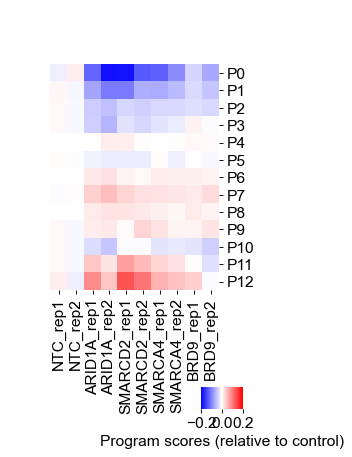

In [45]:
import seaborn as sns

programs=['P' + str(x) for x in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]]

perturb.pp.obs_mean(arata2,grouping_variable='sample',obs=programs,
                   outpref='pro.mean')

arata_probulk_normntc=subtract_columns_mean(arata2.uns['pro.mean'].T.loc[:,perturbs],
                      ['NTC_rep1','NTC_rep2'])


x=0.2
g=sns.clustermap(arata_probulk_normntc.loc[:,perturbs],
               row_cluster=False,
                 col_cluster=False,
               yticklabels=True,
                 xticklabels=True,
               figsize=(3.5,5.5),
               cbar_pos=(0.75, 0.05, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "Program scores (relative to control)",
                'ticks':[-x,0,x]},
               cmap='bwr',vmin=-x,vmax=x)

plt.savefig(FIGS+'gene.pro.x.shareseq.pdf',transparent=True)
plt.savefig(FIGS+'gene.pro.x.shareseq.png',transparent=True)

In [46]:
programs

['P0',
 'P1',
 'P2',
 'P3',
 'P4',
 'P5',
 'P6',
 'P7',
 'P8',
 'P9',
 'P10',
 'P11',
 'P12']

In [47]:
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'P5', 'P7', 'P8', 'P4', 'P12', 'P2', 'P10', 'P9', 'P3', 'P11', 'P6', 'P1', 'P0'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pro.mean'

In [48]:
elts

,cBAF,ncBAF,PBAF,loops,PROMOTERS,cBAF.ncBAF.PBAF,cBAF.ncBAF,ncBAF.PBAF,cBAF.PBAF,cBAFonly,...,cBAFonly..tss.,cBAFonly..distal.,ncBAFonly..tss.,ncBAFonly..distal.,PBAFonly..tss.,PBAFonly..distal.,not.bound.by.BAF..tss.,not.bound.by.BAF..distal.,ko,nCount_peaks
"R1.30,R2.68,R3.88,ARID1A_rep2",-0.092614,0.505936,0.267852,0.172541,-0.297952,0.455316,-0.073474,-0.184262,0.029401,-1.824901,...,-1.354132,-1.337713,0.236015,1.216526,-0.684659,0.796641,-2.491580,-0.121358,ARID1A,9220
"R1.78,R2.87,R3.52,BRD9_rep2",0.508958,-0.327658,0.528044,-1.408915,0.370756,-0.405215,0.185964,1.404166,1.879720,-0.252307,...,-0.171534,-0.215058,-0.232766,-2.241024,-1.495286,-0.815118,-0.539460,-0.498491,BRD9,734
"R1.30,R2.96,R3.61,ARID1A_rep2",-0.642309,-0.617543,-0.443798,0.156851,0.270800,-0.270878,-1.123456,0.544973,-0.254310,-0.211301,...,0.927918,-0.753849,-0.877181,-1.041924,-0.219576,-1.226893,-0.193297,3.114313,ARID1A,6086
"R1.44,R2.64,R3.87,SMARCA4_rep2",0.798720,-0.111853,-0.284460,-0.593732,-0.362553,0.256939,0.927794,-1.592352,0.462431,0.542774,...,-0.044443,0.662317,-1.218458,0.648998,-0.054276,-1.474749,-0.544531,0.776059,SMARCA4,2176
"R1.32,R2.03,R3.05,ARID1A_rep2",-0.716632,0.872285,0.576963,1.153404,-0.375050,0.466393,-0.889023,1.734013,-0.300386,-2.163736,...,-1.159469,-1.882582,0.231836,0.873876,-0.975350,1.273168,-1.563054,0.555721,ARID1A,6336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"R1.25,R2.23,R3.45,ARID1A_rep2",-0.447794,-0.802071,-0.250149,0.544109,-0.147879,-0.937554,-0.902890,-0.022910,1.704427,-0.091334,...,0.897936,-0.469887,0.388868,1.461725,0.771847,-1.126225,0.584155,-0.010134,ARID1A,245
"R1.91,R2.40,R3.53,SMARCA4_rep1",0.286509,0.261220,1.075951,-0.211944,1.359306,0.961568,-0.092283,-0.877810,-0.026933,-1.749190,...,-0.695078,-1.582248,-0.582777,-1.519724,1.793368,2.610591,0.199734,-0.430654,SMARCA4,377
"R1.67,R2.29,R3.91,BRD9_rep1",-0.235798,-0.118575,-0.976924,0.115811,-0.086174,-0.535720,1.975872,-1.188640,-1.410823,1.631330,...,0.548754,1.571353,1.750590,0.849931,1.765591,-0.735732,-1.908305,-0.206866,BRD9,368
"R1.86,R2.70,R3.65,ARID1A_rep2",0.254238,-0.299989,0.168811,0.837519,0.625109,-0.382461,0.725909,-0.495667,1.417372,-0.012552,...,1.841894,-0.921639,1.773087,-1.308130,1.352315,-1.012604,1.045552,-0.512918,ARID1A,557


In [49]:
motifs_plot=set()

for p in ['ARID1A','SMARCD2','SMARCA4']:#,'BRD9']:

    motiff='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/motif_DE_'+p+'.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.csv'
    motif=pd.read_csv(motiff,sep='\t')
    motif_name=[]
    for i in range(motif.shape[0]):
        m=list(motif['motif.name'])[i]
        if ':' in m:
            m=m.split('::')[1]
        motif_name.append(m)

    motif.index=motif['motif.name']
    motif['signed_mlogp']=np.multiply(np.sign(motif['avg_log2FC']),
                                      -np.log10(motif['p_val_adj']))
    
    fdr=0.1
    motifs_plot_here=set(list(motif.loc[motif['p_val_adj']<fdr,:].index))
    motifs_plot=motifs_plot.union(motifs_plot_here)
motifs_plot=list(motifs_plot)
print(motifs_plot)

['CTCFL', 'JUND(var.2)', 'ZBTB18', 'SNAI2', 'SNAI1', 'MEOX1', 'FOSL2::JUNB', 'ETV1', 'FOS::JUNB', 'MAF::NFE2', 'MAFK', 'EWSR1-FLI1', 'PBX3', 'NFIC(var.2)', 'JUN::JUNB', 'CEBPD', 'HAND2', 'EBF3', 'PKNOX1', 'ELF3', 'CEBPG(var.2)', 'HOXD9', 'MYOG', 'ATOH7', 'NEUROG2(var.2)', 'CEBPG', 'RUNX3', 'THAP1', 'ASCL1', 'FOSL1::JUND', 'ZNF24', 'JDP2', 'DBP', 'CEBPA', 'TCF3', 'TCF12(var.2)', 'MEIS1(var.2)', 'ATF2', 'BATF', 'ESRRB', 'TEF', 'FOS::JUN', 'TWIST1', 'CEBPE', 'POU6F1(var.2)', 'NFE2L1', 'TCF4', 'FOS::JUND', 'SOX13', 'NEUROD1', 'JUN(var.2)', 'NRF1', 'NFATC3', 'BATF::JUN', 'FOSL2::JUND', 'MEIS2(var.2)', 'BACH1', 'MXI1', 'ZEB1', 'DLX5', 'PBX2', 'CDX1', 'GABPA', 'ZNF263', 'MYF5', 'FIGLA', 'BHLHA15(var.2)', 'EBF1', 'MEOX2', 'HOXD13', 'BACH2', 'FOSL1', 'FOSB::JUNB', 'FOSL2', 'HOXC13', 'CREB1', 'SOX2', 'ETV4', 'FOSL1::JUN', 'RUNX2', 'CEBPB', 'HLF', 'HOXA10', 'NFIC::TLX1', 'ELF1', 'JUND', 'SNAI3', 'FOSL1::JUNB', 'MAZ', 'NFATC4', 'FOS', 'NFIL3', 'NFIB', 'ASCL1(var.2)', 'ATOH1(var.2)', 'CTCF', 'HOXC1

In [50]:
f='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/motif_chromvar.scores.FRiP.0.2.MIN_FRAGS.1000.MIN_PEAK.0.MIN_TSS.1.SUBS.full.csv'
mscores=pd.read_csv(f,sep='\t')
mscores=mscores.loc[common,:]
mscores['sample']=arata2.obs['sample']
mscores=mscores.drop(['ko'],axis=1)
mscores.head()

,FOXF2,FOXD1,IRF2,MZF1(var.2),MAX::MYC,PPARG,PAX6,PBX1,RORA,RORA(var.2),...,TEAD4,TFAP2A,TFAP2C(var.2),TWIST1,USF1,USF2,YY2,ZNF263,CREM,sample
"R1.28,R2.36,R3.91,ARID1A_rep2",-0.465048,0.025247,-0.060213,0.451440,0.454174,0.650448,0.251872,-1.518814,0.494244,-2.704481,...,-0.716478,-0.686242,-0.286284,0.703750,-0.491003,-0.437518,0.756344,-0.262496,1.173476,ARID1A_rep2
"R1.57,R2.37,R3.35,SMARCD2_rep2",-0.275465,-0.209425,0.901092,0.684552,-1.129003,-0.869245,0.072732,1.128142,0.272621,-0.744586,...,-0.552937,-0.012428,-0.995596,-0.585875,-0.653609,-1.253566,-0.903483,-0.452849,0.969910,SMARCD2_rep2
"R1.87,R2.34,R3.93,ARID1A_rep2",-1.050752,0.511375,-0.720617,0.853168,-1.462632,0.565306,-2.492150,1.218121,-0.703043,0.996627,...,-0.771878,-0.122354,-0.097828,-1.352630,0.890578,0.500648,0.429146,-0.694008,-0.205860,ARID1A_rep2
"R1.23,R2.56,R3.40,ARID1A_rep1",0.839358,0.713202,0.631650,-1.655893,0.191108,0.991016,0.076075,-0.153595,0.453455,-0.676583,...,0.776081,-0.006615,-0.424793,-0.023682,-0.337220,0.571282,-0.174084,0.633070,0.193891,ARID1A_rep1
"R1.40,R2.89,R3.42,SMARCA4_rep1",-0.307295,0.299303,-1.336169,-0.150231,-0.250975,-0.813398,1.193370,1.573905,-1.199492,-0.876717,...,-0.972742,-0.241859,0.540278,-0.728306,-1.759181,-0.199951,-0.545030,-0.134588,-1.376746,SMARCA4_rep1


In [51]:
len(common)

1044

In [52]:
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'P5', 'P7', 'P8', 'P4', 'P12', 'P2', 'P10', 'P9', 'P3', 'P11', 'P6', 'P1', 'P0'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: 'pro.mean'

In [53]:
for c in mscores.columns:
    arata2.obs[c]=mscores.loc[common,c]
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'P5', 'P7', 'P8', 'P4', 'P12', 'P2', 'P10', 'P9', 'P3', 'P11', 'P6', 'P1', 'P0', 'FOXF2', 'FOXD1', 'IRF2', 'MZF1(var.2)', 'MAX::MYC', 'PPARG', 'PAX6', 'PBX1', 'RORA', 'RORA(var.2)', 'RREB1', 'RXRA::VDR', 'SOX9', 'SRY', 'TAL1::TCF3', 'REL', 'RELA', 'NR1H2::RXRA', 'NFIC::TLX1', 'ZNF354C', 'CTCF', 'EWSR1-FLI1', 'REST', 'NFATC2', 'INSM1', 'RARA::RXRA', 'NR4A2', 'PLAG1', 'ARNT::HIF1A', 'DUX4', 'FOS', 'FOSL2', 'FOXH1', 'JUN', 'JUN(var.2)', 'JUND(var.2)', 'MEF2C', 'MAF::NFE2', 'NR2C2', 'NRF1', 'POU2F2', 'SMAD2::SMAD3::SMAD4', 'STAT1::STAT2', 'TCF7L2', 'ZBTB33', 'ELK4', 'ESR2', 'IRF1', 'STAT1', 'STAT3', 'GATA1::TAL1', 'YY1', 'FOXP2', 'SREBF1', 'SREBF2', 'THAP1', 'KLF5', 'DMRT3', 'FOXG1', 'LBX1', 'NFATC3', 'POU6F1', 'SHOX', 'ALX3', 'BARHL2', 'BHLHE41', 'CENPB', 'CREB3', 'DBP', 'ELF4', 'ELF5', 'EN1', 'E

In [54]:
for c in elts.columns:
    arata2.obs[c]=elts.loc[common,c]
arata2

AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'cBAFonly', 'ncBAFonly', 'PBAFonly', 'P5', 'P7', 'P8', 'P4', 'P12', 'P2', 'P10', 'P9', 'P3', 'P11', 'P6', 'P1', 'P0', 'FOXF2', 'FOXD1', 'IRF2', 'MZF1(var.2)', 'MAX::MYC', 'PPARG', 'PAX6', 'PBX1', 'RORA', 'RORA(var.2)', 'RREB1', 'RXRA::VDR', 'SOX9', 'SRY', 'TAL1::TCF3', 'REL', 'RELA', 'NR1H2::RXRA', 'NFIC::TLX1', 'ZNF354C', 'CTCF', 'EWSR1-FLI1', 'REST', 'NFATC2', 'INSM1', 'RARA::RXRA', 'NR4A2', 'PLAG1', 'ARNT::HIF1A', 'DUX4', 'FOS', 'FOSL2', 'FOXH1', 'JUN', 'JUN(var.2)', 'JUND(var.2)', 'MEF2C', 'MAF::NFE2', 'NR2C2', 'NRF1', 'POU2F2', 'SMAD2::SMAD3::SMAD4', 'STAT1::STAT2', 'TCF7L2', 'ZBTB33', 'ELK4', 'ESR2', 'IRF1', 'STAT1', 'STAT3', 'GATA1::TAL1', 'YY1', 'FOXP2', 'SREBF1', 'SREBF2', 'THAP1', 'KLF5', 'DMRT3', 'FOXG1', 'LBX1', 'NFATC3', 'POU6F1', 'SHOX', 'ALX3', 'BARHL2', 'BHLHE41', 'CENPB', 'CREB3', 'DBP', 'ELF4', 'ELF5', 'EN1', 'E

In [55]:
import copy

lsi_names=["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
             'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops',]
#print(lsi_names)
ps=pd.DataFrame(0,index=lsi_names,columns=programs)
corrs=pd.DataFrame(0,index=lsi_names,columns=programs)
pcount=0
for lsi2 in lsi_names:
    for pro in programs:
        from scipy.stats import spearmanr
        sp,p=spearmanr(arata2.obs[pro],arata2.obs[lsi2])
        ps.loc[lsi2,pro]=np.sign(sp)*(-np.log10(pcount+p))
        corrs.loc[lsi2,pro]=sp

In [56]:
import copy
ps2=copy.deepcopy(ps)
#ps2[ps2.abs()<2]=0

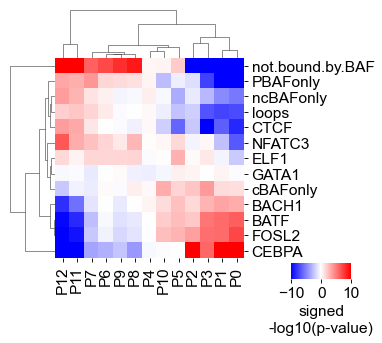

In [57]:
x=10

from scipy.cluster import hierarchy

data=ps2
var_Z = hierarchy.linkage(data,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')
col_Z = hierarchy.linkage(data.T,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')


g=sns.clustermap(ps2,cmap='bwr',vmin=-x,vmax=x,
               row_linkage=var_Z,
               col_linkage=col_Z,
               xticklabels=True,
                 #yticklabels=True,
                 cbar_pos=(0.75, 0.1, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "signed\n-log10(p-value)",
                'ticks':[-x,0,x]},
              figsize=(5,4))

x=ps2
reordered_labels = x.index[g.dendrogram_row.reordered_ind].tolist()
use_labels = ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
             'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]

a=g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)
plt.savefig(FIGS+'features.x.programs.sig.pdf',bbox_inches='tight')
plt.savefig(FIGS+'features.x.programs.sig.png',bbox_inches='tight')

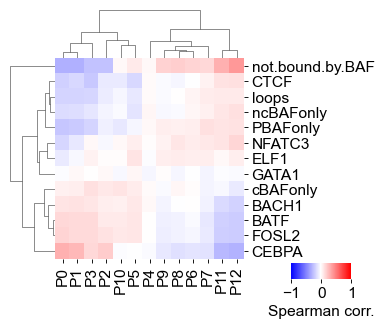

In [58]:
x=1

from scipy.cluster import hierarchy

data=corrs
var_Z = hierarchy.linkage(data,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')
col_Z = hierarchy.linkage(data.T,
                         optimal_ordering=True,
                          metric='cityblock',
                                 method='average')


g=sns.clustermap(corrs,cmap='bwr',vmin=-x,vmax=x,
               row_linkage=var_Z,
               col_linkage=col_Z,
               xticklabels=True,
                 #yticklabels=True,
                 cbar_pos=(0.75, 0.1, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "Spearman corr.",
                'ticks':[-x,0,x]},
              figsize=(5,4))

x=corrs
reordered_labels = x.index[g.dendrogram_row.reordered_ind].tolist()
use_labels = ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
             'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]

a=g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)
plt.savefig(FIGS+'features.x.programs.spcorr.pdf',bbox_inches='tight')
plt.savefig(FIGS+'features.x.programs.spcorr.png',bbox_inches='tight')

In [59]:
#low-dim representation
list(arata2.obs.columns)

['n_genes',
 'n_genes_by_counts',
 'total_counts',
 'total_counts_mt',
 'pct_counts_mt',
 'sample',
 'ko',
 'cBAFonly',
 'ncBAFonly',
 'PBAFonly',
 'P5',
 'P7',
 'P8',
 'P4',
 'P12',
 'P2',
 'P10',
 'P9',
 'P3',
 'P11',
 'P6',
 'P1',
 'P0',
 'FOXF2',
 'FOXD1',
 'IRF2',
 'MZF1(var.2)',
 'MAX::MYC',
 'PPARG',
 'PAX6',
 'PBX1',
 'RORA',
 'RORA(var.2)',
 'RREB1',
 'RXRA::VDR',
 'SOX9',
 'SRY',
 'TAL1::TCF3',
 'REL',
 'RELA',
 'NR1H2::RXRA',
 'NFIC::TLX1',
 'ZNF354C',
 'CTCF',
 'EWSR1-FLI1',
 'REST',
 'NFATC2',
 'INSM1',
 'RARA::RXRA',
 'NR4A2',
 'PLAG1',
 'ARNT::HIF1A',
 'DUX4',
 'FOS',
 'FOSL2',
 'FOXH1',
 'JUN',
 'JUN(var.2)',
 'JUND(var.2)',
 'MEF2C',
 'MAF::NFE2',
 'NR2C2',
 'NRF1',
 'POU2F2',
 'SMAD2::SMAD3::SMAD4',
 'STAT1::STAT2',
 'TCF7L2',
 'ZBTB33',
 'ELK4',
 'ESR2',
 'IRF1',
 'STAT1',
 'STAT3',
 'GATA1::TAL1',
 'YY1',
 'FOXP2',
 'SREBF1',
 'SREBF2',
 'THAP1',
 'KLF5',
 'DMRT3',
 'FOXG1',
 'LBX1',
 'NFATC3',
 'POU6F1',
 'SHOX',
 'ALX3',
 'BARHL2',
 'BHLHE41',
 'CENPB',
 'CREB3',


In [60]:
items=motifs_plot
for i in ['P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11',
     'cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']:
    items.append(i)
print(len(items))

130


In [61]:
corrs=perturb.util.corr_mat(arata2.obs.loc[:,items].T)

In [62]:
corrs.shape

(130, 130)

In [63]:
badata=sc.AnnData(corrs)
badata.obs_names=items
badata

AnnData object with n_obs × n_vars = 130 × 130

In [64]:
sc.pp.pca(badata)

computing PCA
    with n_comps=50
    finished (0:00:00)


In [65]:
sc.pp.neighbors(badata)
sc.tl.umap(badata)

computing neighbors
    using 'X_pca' with n_pcs = 50
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:12)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:00)


In [66]:
badata

AnnData object with n_obs × n_vars = 130 × 130
    uns: 'pca', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [67]:
pcs=badata.obsm['X_pca']
umaps=badata.obsm['X_umap']

In [74]:
FIGS

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'

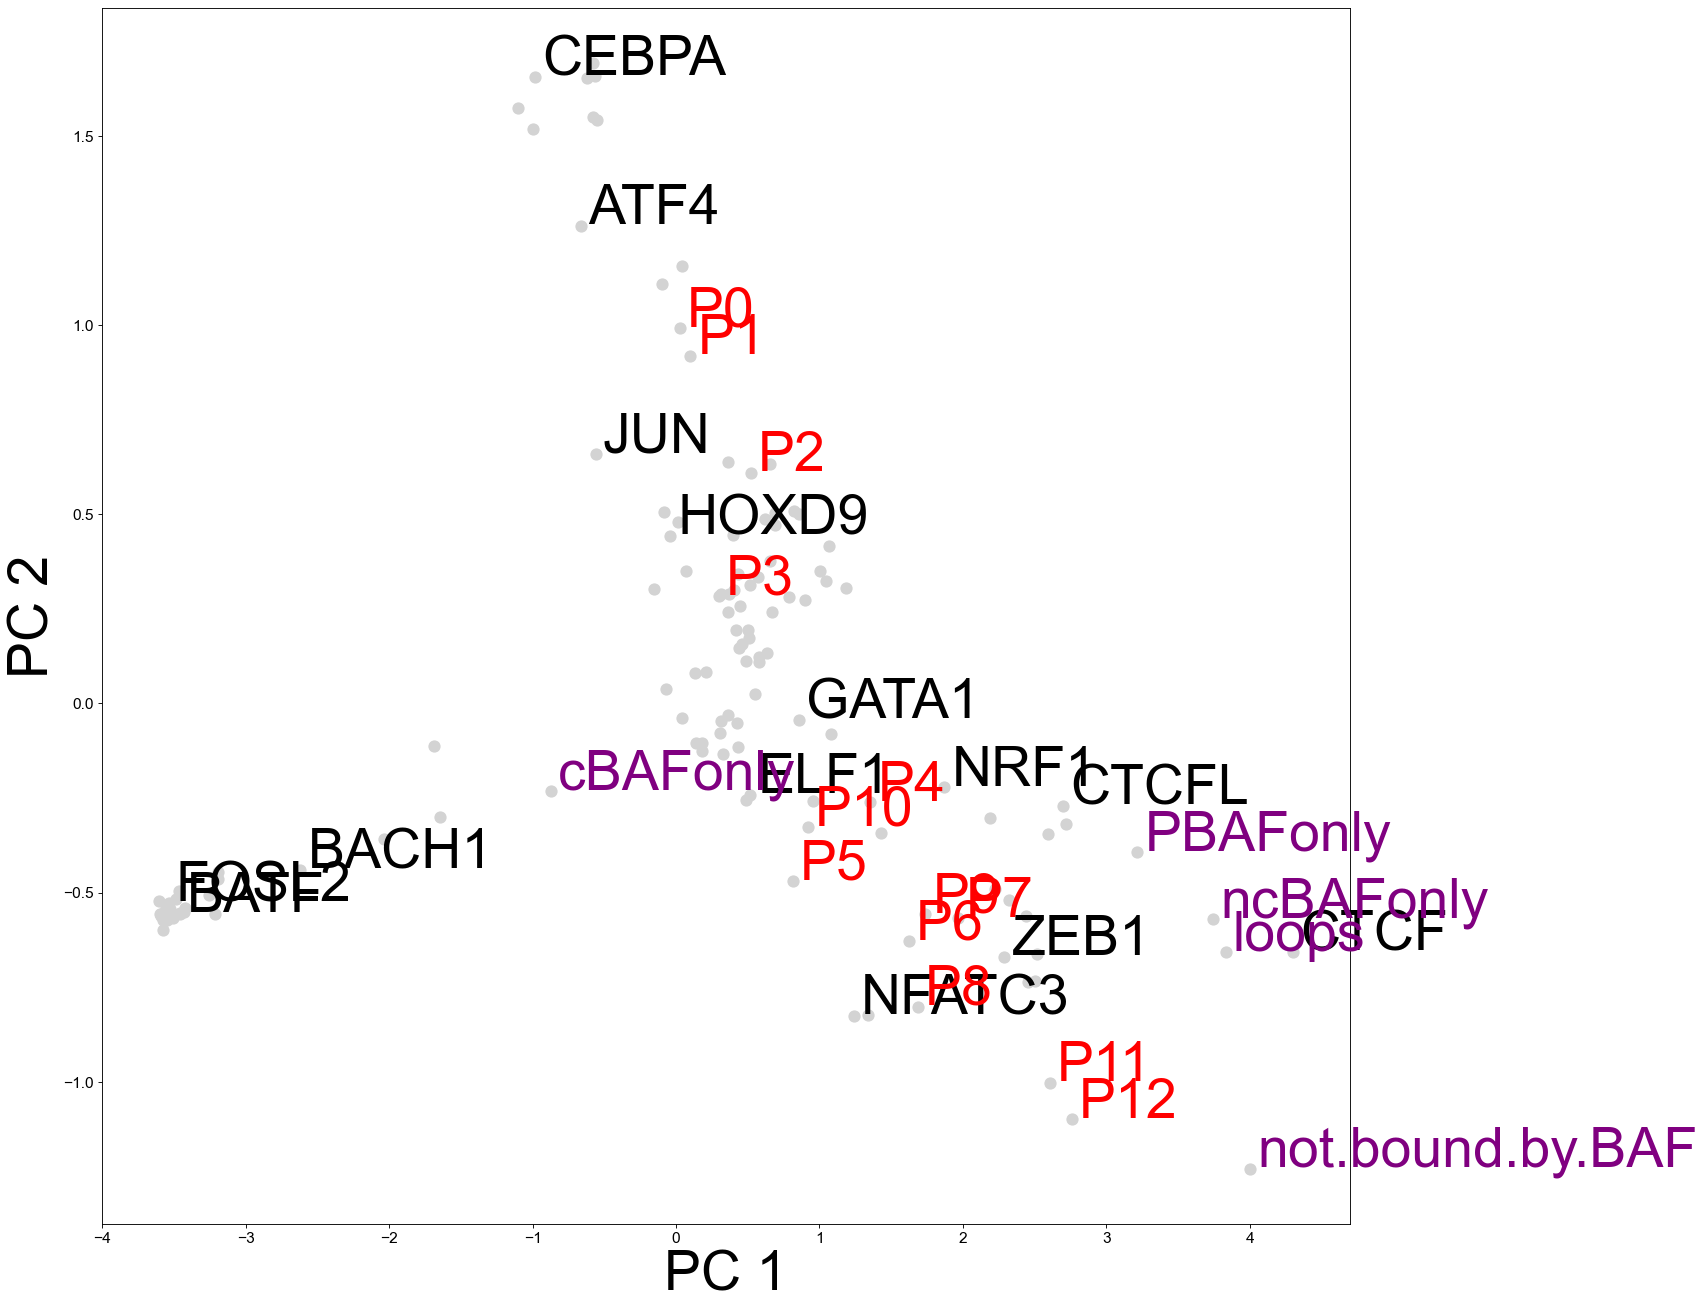

In [85]:
xs=pcs[:,0]
ys=pcs[:,1]
xplus=0.05
yplus=0.005
fontsize=50

fig,plots=plt.subplots(1)
fig.set_size_inches(20,20)

plots.scatter(xs,ys,color='lightgray',s=100)
for i, txt in enumerate(badata.obs_names):
    
    #'''
    if txt not in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops',
                   "CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
                   'ATF4','JUN','GATA1','HOXD9','NRF1','CTCFL','ZEB1',
                  'P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11',]:
        continue
    #'''
    
    if txt in ['P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11']:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='red',fontsize=fontsize)
    elif txt in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='purple',fontsize=fontsize)
    elif txt in ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3']:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='black',fontsize=fontsize)
    else:
        plots.annotate(txt, (xs[i]+xplus, ys[i]+yplus),color='black',fontsize=fontsize)
plt.grid(False)
plt.xlabel('PC 1',fontsize=fontsize)
plt.ylabel('PC 2',fontsize=fontsize)
plt.savefig(FIGS+'features_pca.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'features_pca.png',transparent=True,bbox_inches='tight')

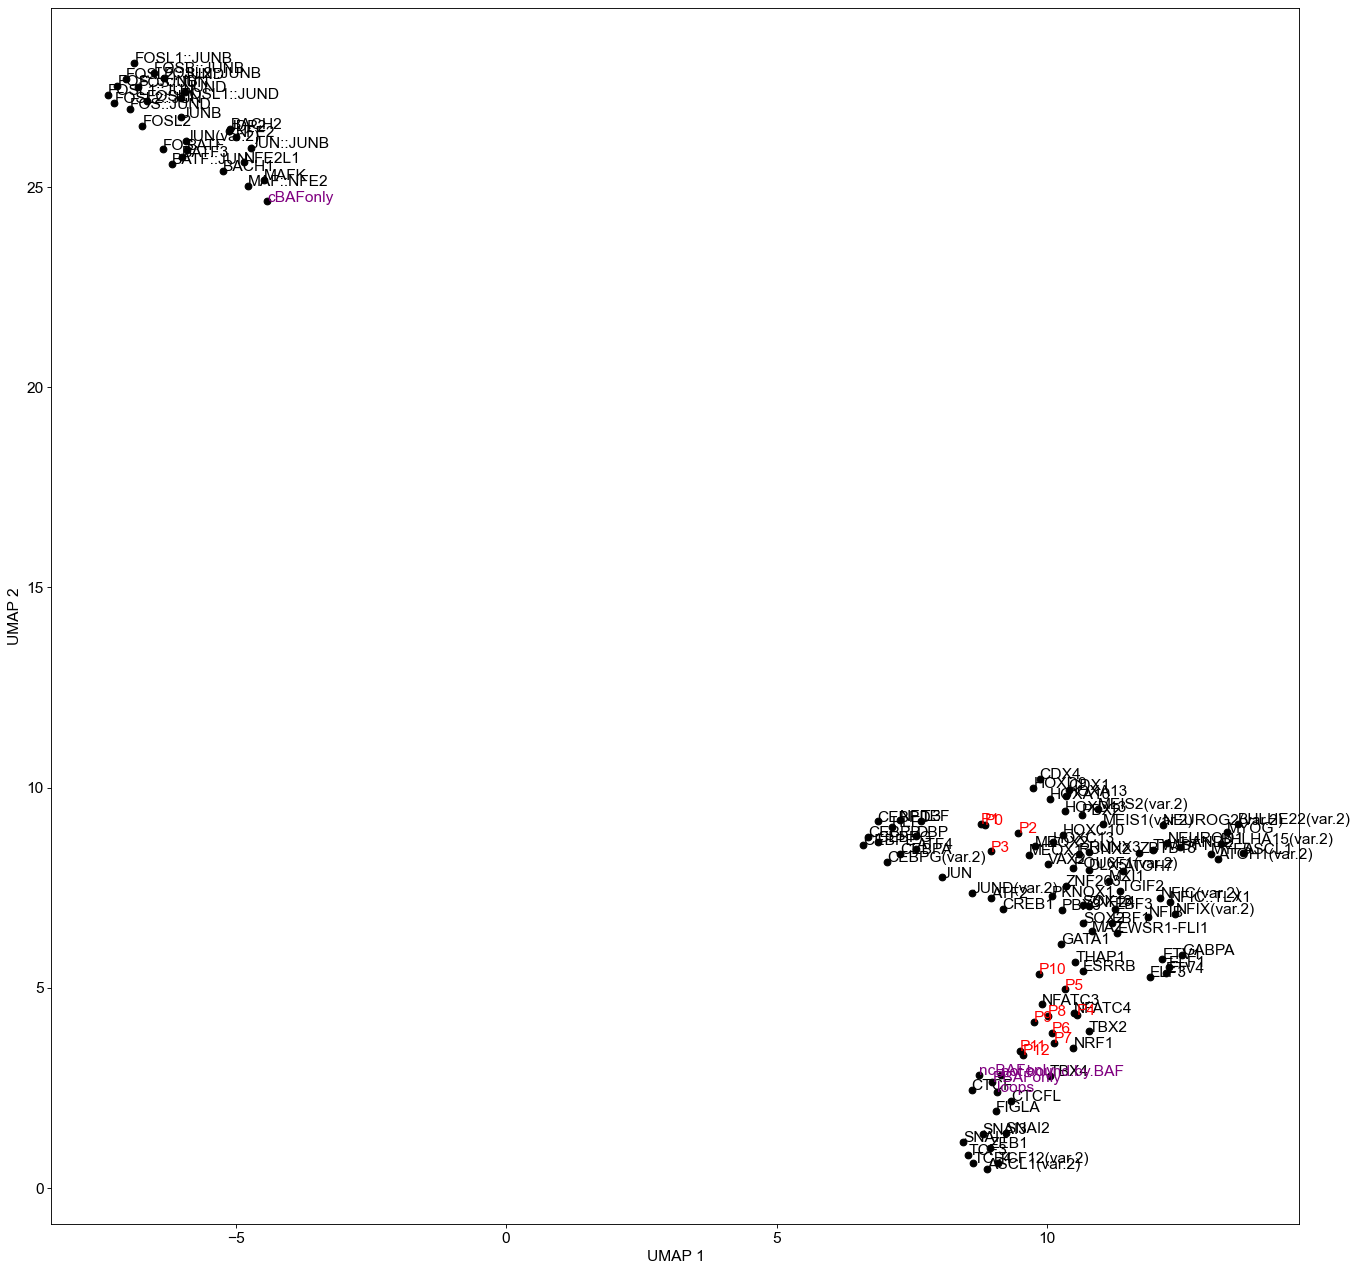

In [121]:
xs=umaps[:,0]
ys=umaps[:,1]

fig,plots=plt.subplots(1)
fig.set_size_inches(20,20)

plots.scatter(xs,ys,color='black')
for i, txt in enumerate(badata.obs_names):
    '''
    if txt not in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops',
                   "CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3',
                  'P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11',]:
        continue
    '''
    #if 'HOX' in txt:
    #    print(xs[i],ys[i])
    if txt in ['P6',
 'P12',
 'P3',
 'P7',
 'P10',
 'P4',
 'P9',
 'P8',
 'P2',
 'P5',
 'P0',
 'P1',
 'P11']:
        plots.annotate(txt, (xs[i], ys[i]),color='red')
    elif txt in ['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops']:
        plots.annotate(txt, (xs[i], ys[i]),color='purple')
    elif txt in ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3']:
        plots.annotate(txt, (xs[i], ys[i]),color='black')
    else:
        plots.annotate(txt, (xs[i], ys[i]),color='black')
plt.grid(False)
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.savefig(FIGS+'features_umap.pdf',transparent=True,bbox_inches='tight')
plt.savefig(FIGS+'features_umap.png',transparent=True,bbox_inches='tight')

In [124]:
elt_names=list(set(elts.columns).difference(set(['ko','nCount_peaks'])))
print(elt_names)
elt_names=['cBAFonly','ncBAFonly','PBAFonly','not.bound.by.BAF','loops','distal','PROMOTERS']

elts_here=elts.loc[arata2.obs_names,:]
elts_here['sample']=arata2.obs['sample']
elts_here=elts_here.groupby('sample').mean().loc[:,elt_names]

elts_here.head()

['ncBAF..distal.', 'cBAF.PBAF..tss.', 'ncBAF.PBAF..tss.', 'PBAF..distal.', 'cBAF.PBAF..distal.', 'distal', 'PBAFonly..distal.', 'cBAF.ncBAF.PBAF..distal.', 'ncBAFonly..distal.', 'cBAF..tss.', 'ncBAFonly', 'cBAF.ncBAF.PBAF..tss.', 'not.bound.by.BAF..distal.', 'cBAF..distal.', 'cBAFonly..distal.', 'ncBAFonly..tss.', 'PBAF..tss.', 'ncBAF.PBAF', 'loops..distal.', 'cBAFonly', 'cBAF', 'cBAF.ncBAF.PBAF', 'cBAF.ncBAF', 'cBAF.PBAF', 'not.bound.by.BAF', 'cBAF.ncBAF..distal.', 'ncBAF.PBAF..distal.', 'PBAFonly..tss.', 'ncBAF', 'PROMOTERS', 'loops..tss.', 'cBAFonly..tss.', 'ncBAF..tss.', 'not.bound.by.BAF..tss.', 'PBAF', 'cBAF.ncBAF..tss.', 'loops', 'PBAFonly']


,cBAFonly,ncBAFonly,PBAFonly,not.bound.by.BAF,loops,distal,PROMOTERS
sample,,,,,,,
ARID1A_rep1,-0.420293,0.543567,0.288451,0.670327,0.498258,-0.275878,0.209610
ARID1A_rep2,-0.539036,0.372007,0.406809,0.409376,0.254958,-0.114620,0.106751
BRD9_rep1,0.609103,-0.977808,-0.398460,-0.808193,-1.062226,0.254948,-0.241187
BRD9_rep2,0.273763,-1.084686,-0.301986,-0.738661,-0.925570,0.183639,-0.195615
NTC_rep1,0.599673,-0.727472,-0.361312,-0.729489,-0.889942,0.156547,-0.137667


/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/atac.chromvar_bafscores.x.shareseq.pdf


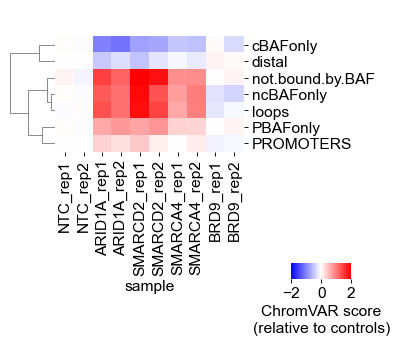

In [125]:
elts_normntc=subtract_columns_mean(elts_here.T,
                      ['NTC_rep1','NTC_rep2'])

x=2
g=sns.clustermap(elts_normntc.T.loc[perturbs,:].T,
               #row_cluster=False,
                 col_cluster=False,
               yticklabels=True,
               figsize=(5,4),
               cbar_pos=(0.75, 0.1, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "ChromVAR score\n(relative to controls)",
                'ticks':[-x,0,x]},
                 #metric='correlation',
                 xticklabels=True,
               cmap='bwr',vmin=-x,vmax=x)
plt.savefig(OUT+'atac.chromvar_bafscores.x.shareseq.pdf',transparent=True)
print(OUT+'atac.chromvar_bafscores.x.shareseq.pdf')

In [127]:
motifs_plot

['HOXC13',
 'FOSL1',
 'BACH2',
 'DBP',
 'CTCFL',
 'SOX13',
 'BATF3',
 'CDX4',
 'ASCL1',
 'EWSR1-FLI1',
 'CEBPG(var.2)',
 'NEUROD1',
 'TCF4',
 'TBX2',
 'FOSL2',
 'MEIS2(var.2)',
 'GATA1',
 'ATF2',
 'FOS',
 'NFE2L1',
 'NFE2',
 'DLX5',
 'ZBTB18',
 'ASCL1(var.2)',
 'JUN(var.2)',
 'HLF',
 'TEF',
 'TGIF2',
 'NFIC::TLX1',
 'MYF5',
 'MEOX2',
 'NFIB',
 'ELF3',
 'CTCF',
 'TBX4',
 'JUND(var.2)',
 'FOSL2::JUN',
 'BACH1',
 'MEIS1(var.2)',
 'BATF::JUN',
 'HOXA13',
 'CREB1',
 'MAFK',
 'ETV4',
 'ESRRB',
 'NEUROG2(var.2)',
 'POU6F1(var.2)',
 'PBX3',
 'ELF1',
 'CDX1',
 'PBX2',
 'SNAI2',
 'ATOH1(var.2)',
 'FOSL1::JUNB',
 'CEBPD',
 'HOXC10',
 'BHLHE22(var.2)',
 'FIGLA',
 'RUNX2',
 'SOX2',
 'HOXD9',
 'MYOG',
 'JUND',
 'FOS::JUND',
 'JUN::JUNB',
 'THAP1',
 'FOS::JUN',
 'TWIST1',
 'EBF3',
 'JDP2',
 'SNAI3',
 'SNAI1',
 'EBF1',
 'MAF::NFE2',
 'HOXD13',
 'ATF4',
 'HAND2',
 'CEBPE',
 'NFIL3',
 'CEBPB',
 'TCF12(var.2)',
 'BATF',
 'CEBPA',
 'ETV1',
 'PKNOX1',
 'NFIX(var.2)',
 'ZNF263',
 'BHLHA15(var.2)',
 'HOXA10'

In [129]:
mscores_bulk=mscores.groupby(['sample']).mean()
print(mscores_bulk)

                 FOXF2     FOXD1      IRF2  MZF1(var.2)  MAX::MYC     PPARG  \
sample                                                                        
ARID1A_rep1  -0.133024 -0.129299  0.176585    -0.196271 -0.058156  0.046828   
ARID1A_rep2  -0.056659  0.017985  0.067287    -0.027387  0.065169 -0.103431   
BRD9_rep1    -0.082028  0.038042 -0.029694     0.056639  0.074792 -0.179662   
BRD9_rep2    -0.077316 -0.059196  0.045213     0.180406 -0.113799  0.256602   
NTC_rep1      0.056195  0.010110 -0.017081     0.060082 -0.096619  0.003673   
NTC_rep2     -0.098964 -0.092824 -0.130973     0.029208  0.134248 -0.115564   
SMARCA4_rep1  0.034610 -0.026759  0.072045    -0.090825  0.072151 -0.022083   
SMARCA4_rep2  0.000034  0.040403  0.029172    -0.051809 -0.028363 -0.024910   
SMARCD2_rep1  0.021144  0.027599  0.056620     0.051754 -0.084252  0.011008   
SMARCD2_rep2  0.077512  0.091294  0.161252     0.111303  0.058109  0.046835   

                  PAX6      PBX1      RORA  RORA(va

In [131]:
motifs_plot=list(set(motifs_plot).intersection(set(mscores.columns)))

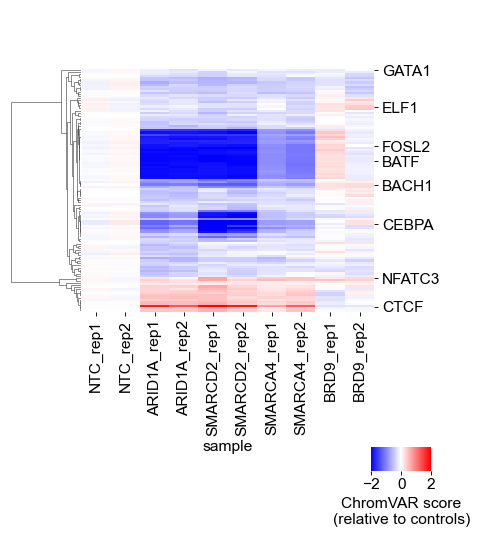

In [132]:
mscores_bulk_normntc=subtract_columns_mean(mscores_bulk.T,
                      ['NTC_rep1','NTC_rep2'])


x=2
g=sns.clustermap(mscores_bulk_normntc.T.loc[perturbs,motifs_plot].T,
               #row_cluster=False,
                 col_cluster=False,
               yticklabels=False,
               figsize=(5,6),
               cbar_pos=(0.95, 0.001, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "ChromVAR score\n(relative to controls)",
                'ticks':[-x,0,x]},
                 metric='correlation',
                 xticklabels=True,
               cmap='bwr',vmin=-x,vmax=x)

x=mscores_bulk_normntc.T.loc[perturbs,motifs_plot].T
reordered_labels = x.index[g.dendrogram_row.reordered_ind].tolist()
use_labels = ["CTCF",'BATF','FOSL2','BACH1','CEBPA','ELF1','GATA1','NFATC3']
use_ticks = [reordered_labels.index(label) + .5 for label in use_labels]

g.ax_heatmap.set(yticks=use_ticks, yticklabels=use_labels)

plt.savefig(OUT+'atac.chromvar_motifs.x.shareseq.pdf',transparent=True,
           bbox_inches='tight')

In [133]:
OUT

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'

In [12]:
lsadata.obs

,ko,rep
"R1.30,R2.68,R3.88,ARID1A_rep2",ARID1A,ARID1A_rep2
"R1.78,R2.87,R3.52,BRD9_rep2",BRD9,BRD9_rep2
"R1.30,R2.96,R3.61,ARID1A_rep2",ARID1A,ARID1A_rep2
"R1.44,R2.64,R3.87,SMARCA4_rep2",SMARCA4,SMARCA4_rep2
"R1.32,R2.03,R3.05,ARID1A_rep2",ARID1A,ARID1A_rep2
...,...,...
"R1.25,R2.23,R3.45,ARID1A_rep2",ARID1A,ARID1A_rep2
"R1.91,R2.40,R3.53,SMARCA4_rep1",SMARCA4,SMARCA4_rep1
"R1.67,R2.29,R3.91,BRD9_rep1",BRD9,BRD9_rep1
"R1.86,R2.70,R3.65,ARID1A_rep2",ARID1A,ARID1A_rep2


In [20]:
perturb.tl.bulk(lsadata,'rep')

In [21]:
lsadata.var_names

Index(['LSI_2', 'LSI_3', 'LSI_4', 'LSI_5', 'LSI_6', 'LSI_7', 'LSI_8', 'LSI_9',
       'LSI_10', 'LSI_11', 'LSI_12', 'LSI_13', 'LSI_14', 'LSI_15', 'LSI_16',
       'LSI_17', 'LSI_18', 'LSI_19', 'LSI_20', 'LSI_21', 'LSI_22', 'LSI_23',
       'LSI_24', 'LSI_25', 'LSI_26', 'LSI_27', 'LSI_28', 'LSI_29', 'LSI_30',
       'LSI_31'],
      dtype='object')

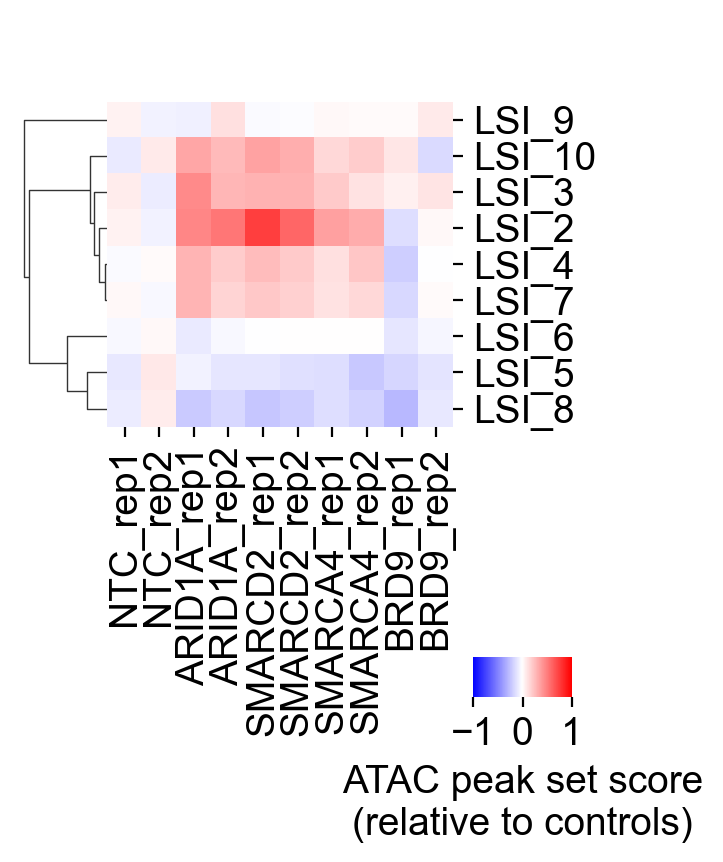

In [32]:
import re
import seaborn as sns

perturbs=['NTC_rep1','NTC_rep2',
         'ARID1A_rep1','ARID1A_rep2',
          'SMARCD2_rep1','SMARCD2_rep2',
          'SMARCA4_rep1','SMARCA4_rep2',
          'BRD9_rep1','BRD9_rep2',
         ]

lsi_normntc=subtract_columns_mean(lsadata.uns['bulk.rep'].T,
                      ['NTC_rep1','NTC_rep2'])
#lsi_normntc.index=[re.sub('LSI_','ATAC peak set ',x) for x in lsi_normntc.index]


x=1
g=sns.clustermap(lsi_normntc.T.iloc[:,:9].loc[perturbs,:].T,
               #row_cluster=False,
                 col_cluster=False,
               yticklabels=True,
               figsize=(3.3,4),
               cbar_pos=(0.75, 0.1, 0.15, 0.05),
                 cbar_kws={'orientation':'horizontal',
                "label": "ATAC peak set score\n(relative to controls)",
                'ticks':[-x,0,x]},
                 metric='correlation',
                 xticklabels=True,
               cmap='bwr',vmin=-x,vmax=x)
plt.savefig(OUT+'atac.lsi.x.shareseq.pdf',transparent=True,bbox_inches='tight')

In [30]:
OUT

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'

In [33]:
FIGS

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'

In [34]:
DATA="/Users/ursuo/Documents/research/baf/data/2022-03-27/single_guide"
FIGS="/Users/ursuo/Documents/research/baf/data/2022-03-27/Figures/"
pref=DATA+'/Baf.single_gene'

In [35]:
adata=sc.read(pref+'.guide_qc.lm.h5ad')
adata

Only considering the two last: ['.lm', '.h5ad'].
Only considering the two last: ['.lm', '.h5ad'].


AnnData object with n_obs × n_vars = 38677 × 1246
    obs: 'batch', 'n_genes', 'percent_mito', 'n_counts', 'batch_num11', 'batch_num3', 'batch_num0', 'batch_num12', 'batch_num4', 'batch_num9', 'batch_num6', 'batch_num5', 'batch_num14', 'batch_num8', 'batch_num13', 'batch_num2', 'batch_num10', 'batch_num1', 'batch_num7', 'louvain', 'BCL7B_1', 'BCL7B_4', 'SMARCD3_4', 'DPF1_3', 'SMARCA2_3', 'PBRM1_3', 'SMARCA4_7', 'SMARCC1_5', 'SMARCC2_4', 'SS18_3', 'ACTL6B_1', 'SMARCD1_2', 'BRD9_1', 'SMARCE1_3', 'PHF10_3', 'NTC6_IG1216445', 'ARID1A_7', 'BCL7C_3', 'BRD7_4', 'DPF3_2', 'PBRM1_1', 'SMARCB1_1', 'SMARCB1_7', 'DPF1_4', 'BCL7C_1', 'ARID2_4', 'GLTSCR1L_2', 'NTC5_mNTC100A67005', 'SMARCA2_4', 'GLTSCR1L_3', 'DPF2_2', 'SMARCA4_1', 'BCL7A_4', 'DPF1_2', 'BRD9_3', 'PHF10_4', 'SMARCE1_2', 'ACTL6B_3', 'SMARCD3_2', 'SMARCD2_2', 'BCL7B_3', 'SMARCD1_3', 'SMARCC2_3', 'ACTL6A_2', 'DPF1_1', 'SMARCD3_1', 'SMARCC1_7', 'ACTL6A_1', 'BRD7_3', 'SMARCC2_1', 'ARID1A_2', 'SMARCD2_1', 'SS18_4', 'DPF2_4', 'SS18_2', 'GLTSC

In [36]:
modelname='alpha.0.0005'
y=adata.uns['PS.'+modelname+'.coef']
y

,BCL7B,SS18L,SMARCC1,PHF10,GLTSCR1L,ACTL6A,SMARCE1,PBRM1,SMARCC2,ACTL6B,...,batch_num5,batch_num14,batch_num8,batch_num13,batch_num2,batch_num10,batch_num1,batch_num7,percent_mito,n_counts
HES4,-0.000533,-0.000000,0.059711,0.000000,-0.003774,0.001525,0.029734,-0.000000,0.001307,0.000000,...,0.000000,0.000727,-0.000000,0.004318,-0.000962,0.004948,-0.000000,-0.000000,-0.000000,-2.160003e-06
ISG15,0.000000,-0.000000,0.019495,-0.004490,0.000000,-0.000000,0.000000,0.000000,-0.000699,-0.006717,...,-0.000000,-0.000000,-0.001616,0.006275,0.022334,0.007338,0.005459,-0.019336,0.000000,1.806466e-08
RP3-395M20.12,-0.000000,-0.000000,0.003615,0.000000,0.000000,0.000000,0.000000,-0.000000,-0.000000,-0.000000,...,-0.000000,0.000000,-0.000000,-0.000000,-0.000000,0.000570,-0.000000,-0.000000,0.000000,-2.920637e-07
TNFRSF14,-0.001608,0.000000,0.020493,-0.000000,-0.000037,-0.000000,0.010851,0.000000,0.000000,-0.000000,...,-0.000572,0.000000,0.000000,0.000000,-0.000000,0.000000,-0.001522,0.001540,-0.000000,-6.281956e-07
MIR34AHG,-0.000000,-0.000000,0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000,...,-0.000000,-0.000000,0.001544,0.000000,-0.000000,0.000000,0.000000,-0.001744,0.000000,-1.347237e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MT-ND2,-0.008099,0.002765,-0.033933,0.002503,-0.019990,0.063999,-0.038868,0.007675,0.008148,0.011624,...,0.208454,-0.027224,-0.025784,-0.047525,0.148986,-0.035143,0.161688,-0.012745,6.161257,8.803714e-06
MT-ATP8,-0.005103,0.012164,-0.027033,0.004365,-0.000000,-0.013430,-0.062154,-0.012369,0.022648,0.011044,...,0.031502,-0.018862,0.191101,-0.033035,0.016538,0.083009,-0.228397,-0.828542,2.821936,6.080393e-06
MT-ND4L,-0.003486,-0.000479,-0.020811,0.015741,0.000000,0.015148,-0.036731,0.006579,-0.000000,0.000000,...,0.213109,-0.010064,-0.005380,-0.021231,0.314416,-0.005680,0.096617,-0.484533,3.305159,6.441474e-06
MT-ND6,-0.027149,-0.008487,-0.224109,-0.019560,0.000000,0.050895,-0.166950,0.000000,-0.010607,-0.009823,...,-0.015288,0.018796,-0.061050,0.000000,0.160133,-0.035796,0.144332,-0.093445,-0.198224,1.178635e-05


In [200]:
#also bring the RNA
DATA='/Users/ursuo/Documents/research/baf/data/2021-06-17/share/'

atac_mapping=pd.read_csv(DATA+'.jordan.atac_cellname_map.csv')
atac_mapping.index=atac_mapping.loc[:,'old_name']

#now, read in share rna

# load the RNA and ATAC data
rnapath=DATA+'jordan.rna.hg19.UMIcounts.csv.gz'
fragpath=DATA+'jordan.atac.hg19.rmdup.cutoff.labelnames.bed.gz'


arata=sc.read(DATA+'.RNA.filtered.h5ad')
arata

AnnData object with n_obs × n_vars = 3073 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [201]:
arata=arata[arata.obs['total_counts']>2000,:]
arata

View of AnnData object with n_obs × n_vars = 1079 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [202]:
rna_labels=pd.read_csv(DATA+'.jordan.rna_cellname_map.csv')
rna_labels.index=rna_labels['old_name']
rna_labels.head()

common=list(set(arata.obs_names).intersection(set(list(rna_labels.index))))
print(len(common))

arata.obs['sample']=rna_labels.loc[arata.obs_names,'label']
ko=[]
for i in range(arata.n_obs):
    ko.append(arata.obs['sample'][i].split('_')[0])
arata.obs['ko']=ko

arata.obs_names=rna_labels.loc[arata.obs_names,'new_name']

Trying to set attribute `.obs` of view, copying.


1079


In [203]:
common=list(set(arata.obs_names).intersection(set(cell2lsi.index)))
print(len(common))

1044


In [204]:
arata2=arata[common,:]
arata2

View of AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [199]:
#sc.pp.scale(arata2,max_value=10)

/Users/ursuo/anaconda3/lib/python3.8/site-packages/scanpy/preprocessing/_simple.py:845: UserWarning: Revieved a view of an AnnData. Making a copy.
  view_to_actual(adata)


In [205]:
#linear model for share-seq

#use all genes from the single dataset
common_genes=list(set(list(y.index)).intersection(set(list(arata2.raw.var_names))))
print(len(common_genes))
var_genes=common_genes

covariates=[
            'pct_counts_mt', 'total_counts',
           ]
genes_perturbed=list(set(arata2.obs['ko']).difference(set(['unassigned','control'])))
print(genes_perturbed)

for gene in genes_perturbed:
    arata2.obs[gene]=1.0*(arata2.obs['ko']==gene)
arata2

Trying to set attribute `.obs` of view, copying.


1121
['BRD9', 'NTC', 'SMARCD2', 'SMARCA4', 'ARID1A']


AnnData object with n_obs × n_vars = 1044 × 30848
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'BRD9', 'NTC', 'SMARCD2', 'SMARCA4', 'ARID1A'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

In [206]:
#run a few linear models, and pick a good one based on its prediction performance
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
my_rng=np.random.RandomState(1234)

adata_small=arata2[:,var_genes].copy()
adata_small.raw=sc.AnnData(adata_small.raw[:,var_genes].to_adata())

In [207]:
adata_small

AnnData object with n_obs × n_vars = 1044 × 1121
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'BRD9', 'NTC', 'SMARCD2', 'SMARCA4', 'ARID1A'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'

splitting train    835
test     105
valid    104
Name: train_valid_test, dtype: int64
Found 5/5 perturbations
Found 0/0 obs
Found 2/2 covariates
(1044, 5) (1044, 2) (1044, 1121)
train    835
test     105
valid    104
Name: PS.alpha.5e-05.train_valid_test, dtype: int64
train 835
valid 104
test 105

Fitting model
 ElasticNet(alpha=5e-05, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FB648CA9240)


/Users/ursuo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


x (1044, 7)
model coeff (1121, 7)
splitting train    835
test     105
valid    104
Name: train_valid_test, dtype: int64
Found 5/5 perturbations
Found 0/0 obs
Found 2/2 covariates
(1044, 5) (1044, 2) (1044, 1121)
train    835
test     105
valid    104
Name: PS.alpha.0.0005.train_valid_test, dtype: int64
train 835
valid 104
test 105

Fitting model
 ElasticNet(alpha=0.0005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FB648CA9240)


/Users/ursuo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


x (1044, 7)
model coeff (1121, 7)
splitting train    835
test     105
valid    104
Name: train_valid_test, dtype: int64
Found 5/5 perturbations
Found 0/0 obs
Found 2/2 covariates
(1044, 5) (1044, 2) (1044, 1121)
train    835
test     105
valid    104
Name: PS.alpha.0.005.train_valid_test, dtype: int64
train 835
valid 104
test 105

Fitting model
 ElasticNet(alpha=0.005, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FB648CA9240)
x (1044, 7)
model coeff (1121, 7)


/Users/ursuo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


splitting train    835
test     105
valid    104
Name: train_valid_test, dtype: int64
Found 5/5 perturbations
Found 0/0 obs
Found 2/2 covariates
(1044, 5) (1044, 2) (1044, 1121)
train    835
test     105
valid    104
Name: PS.alpha.0.05.train_valid_test, dtype: int64
train 835
valid 104
test 105

Fitting model
 ElasticNet(alpha=0.05, max_iter=10000,
           random_state=RandomState(MT19937) at 0x7FB648CA9240)
x (1044, 7)
model coeff (1121, 7)


/Users/ursuo/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.0, tolerance: 0.0
  model = cd_fast.enet_coordinate_descent(


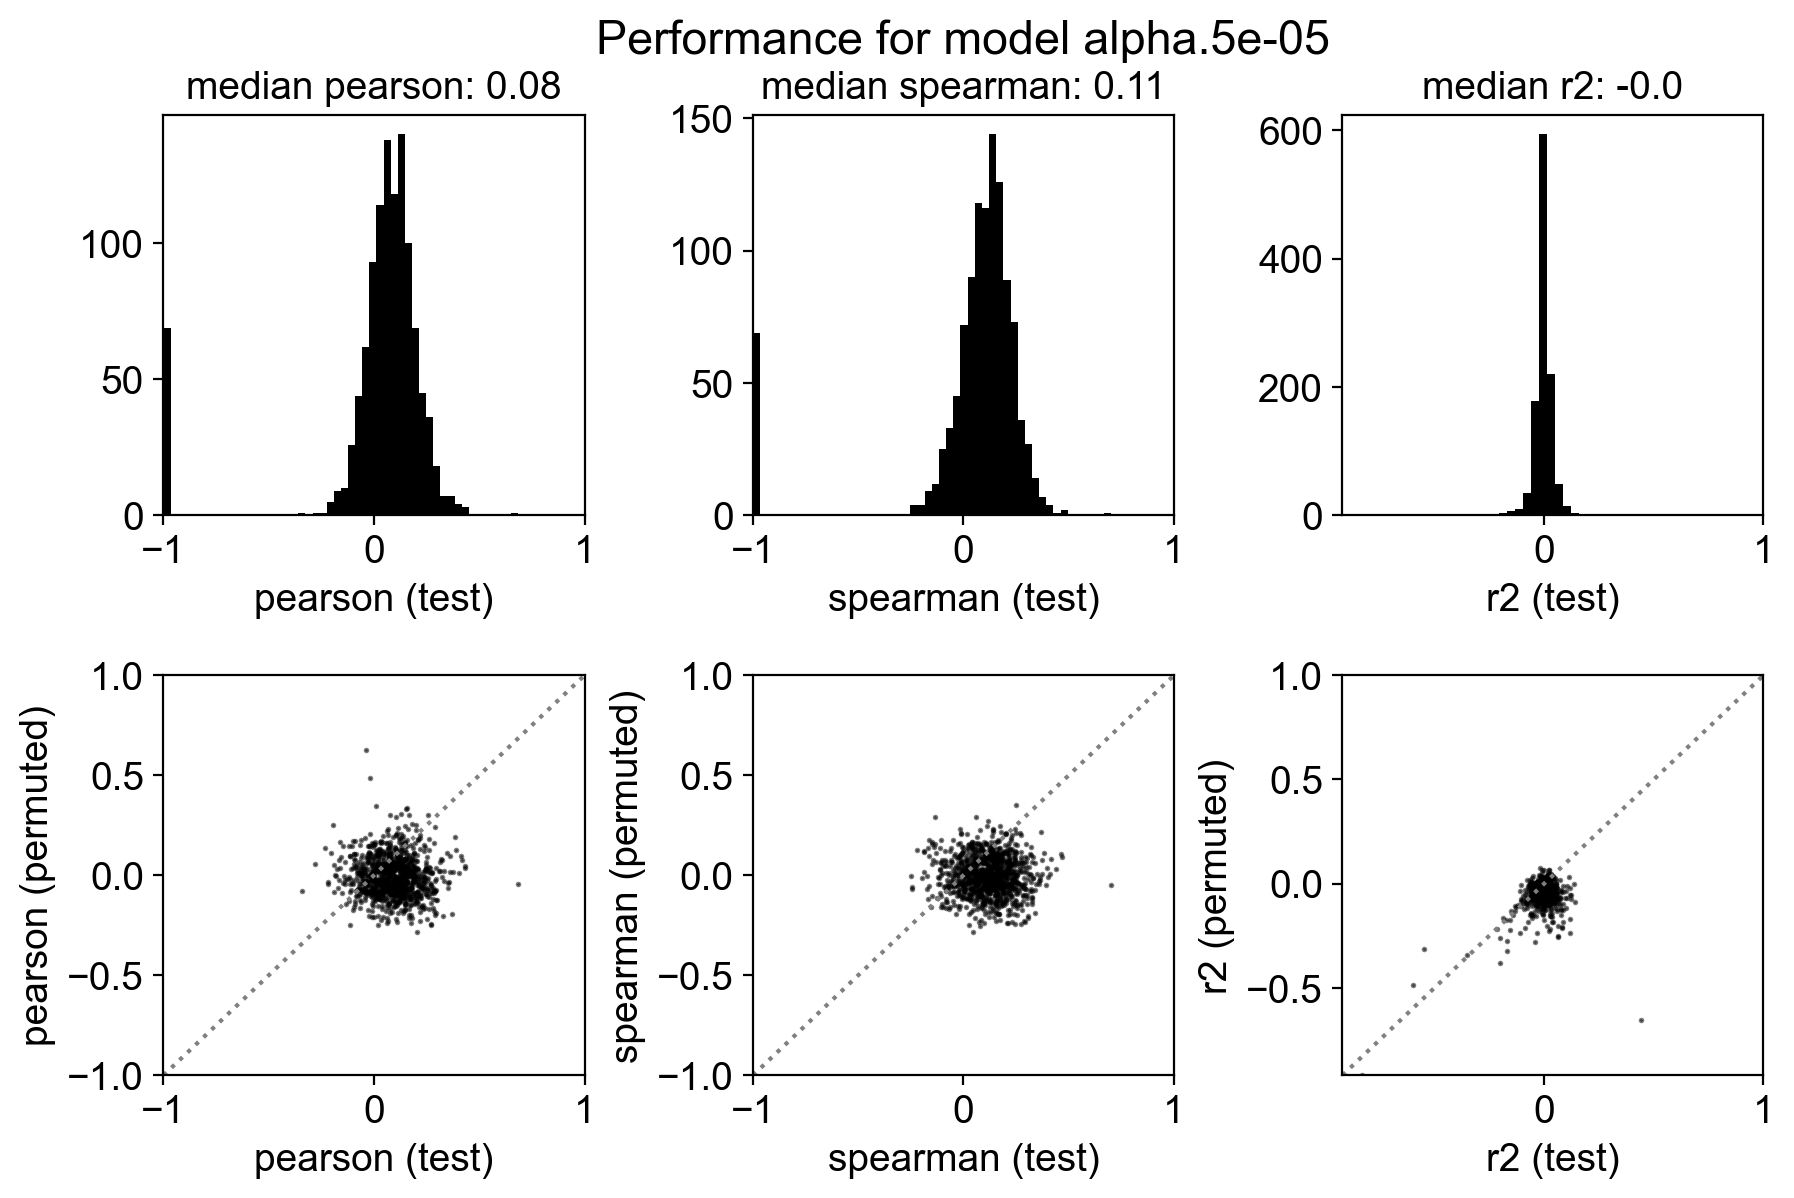

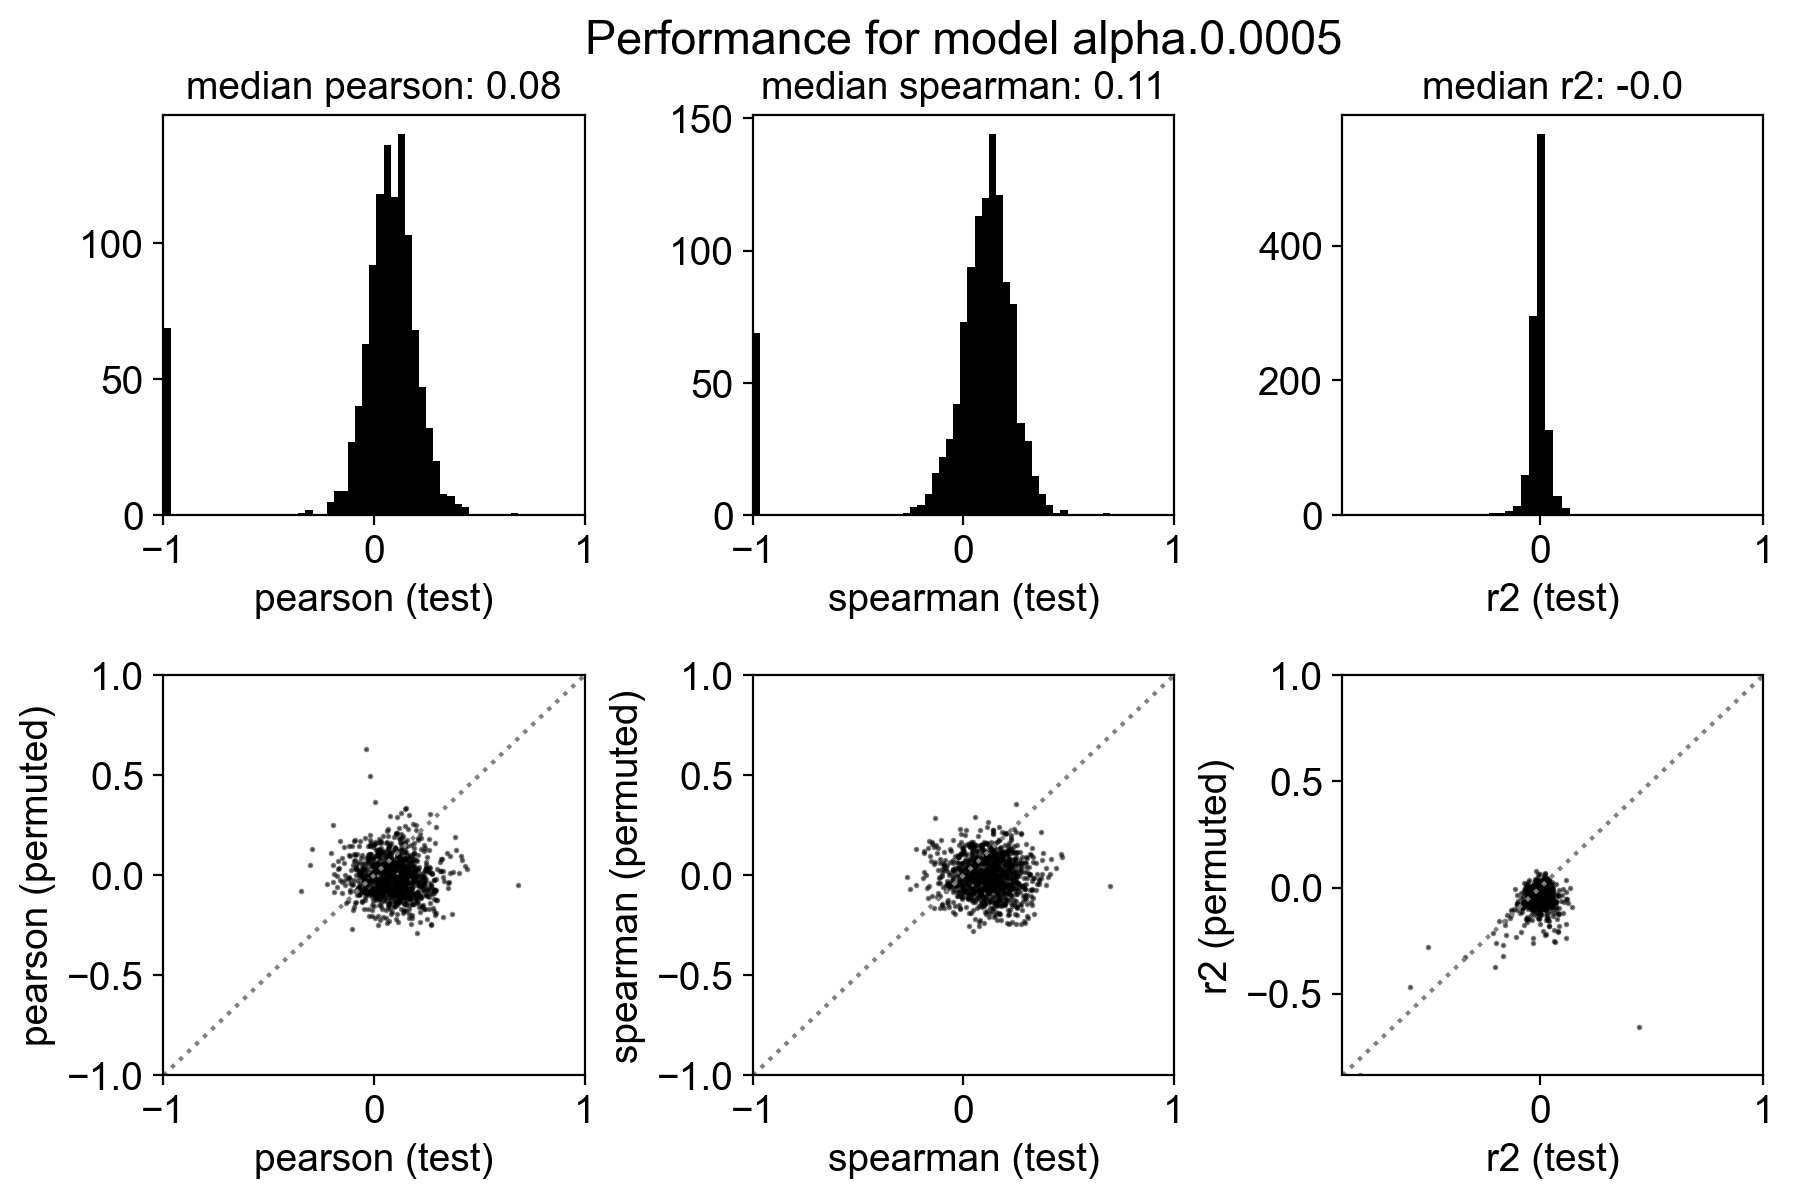

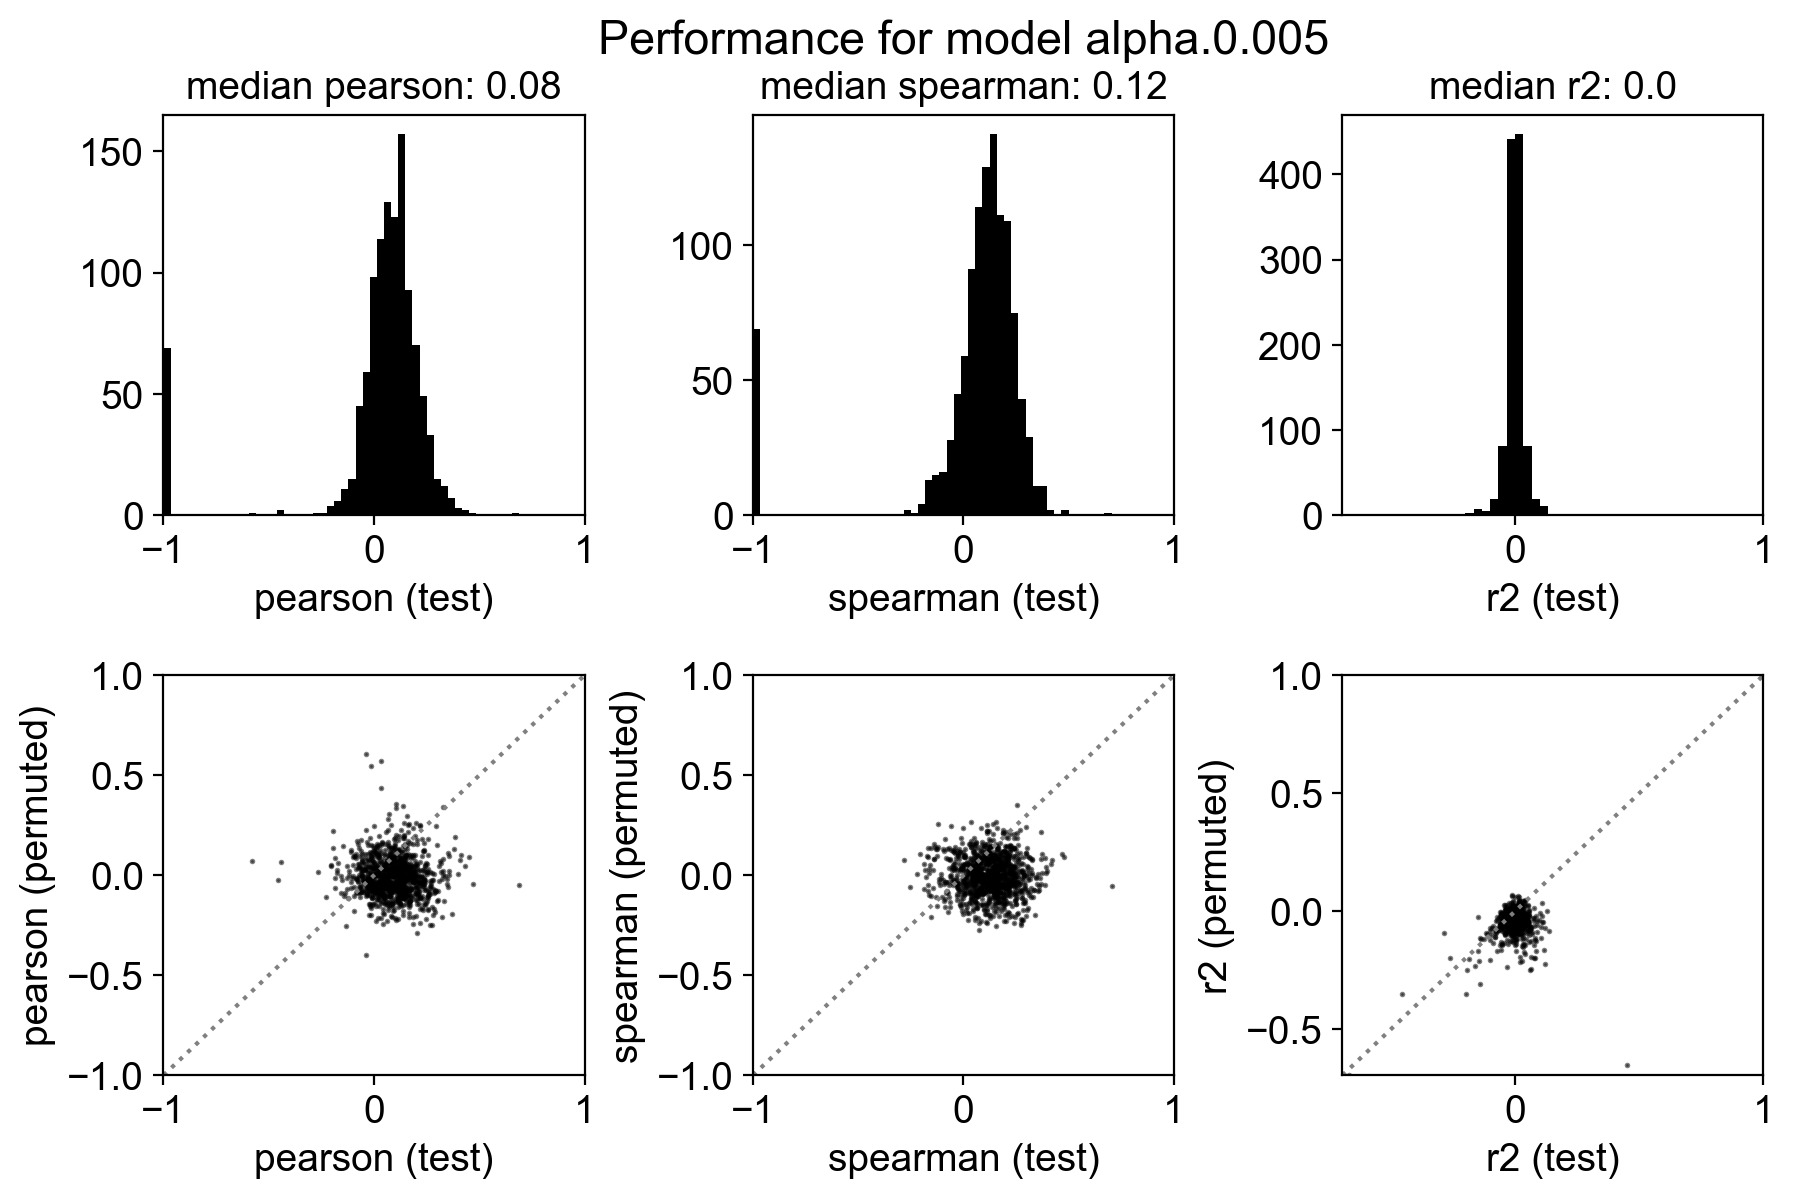

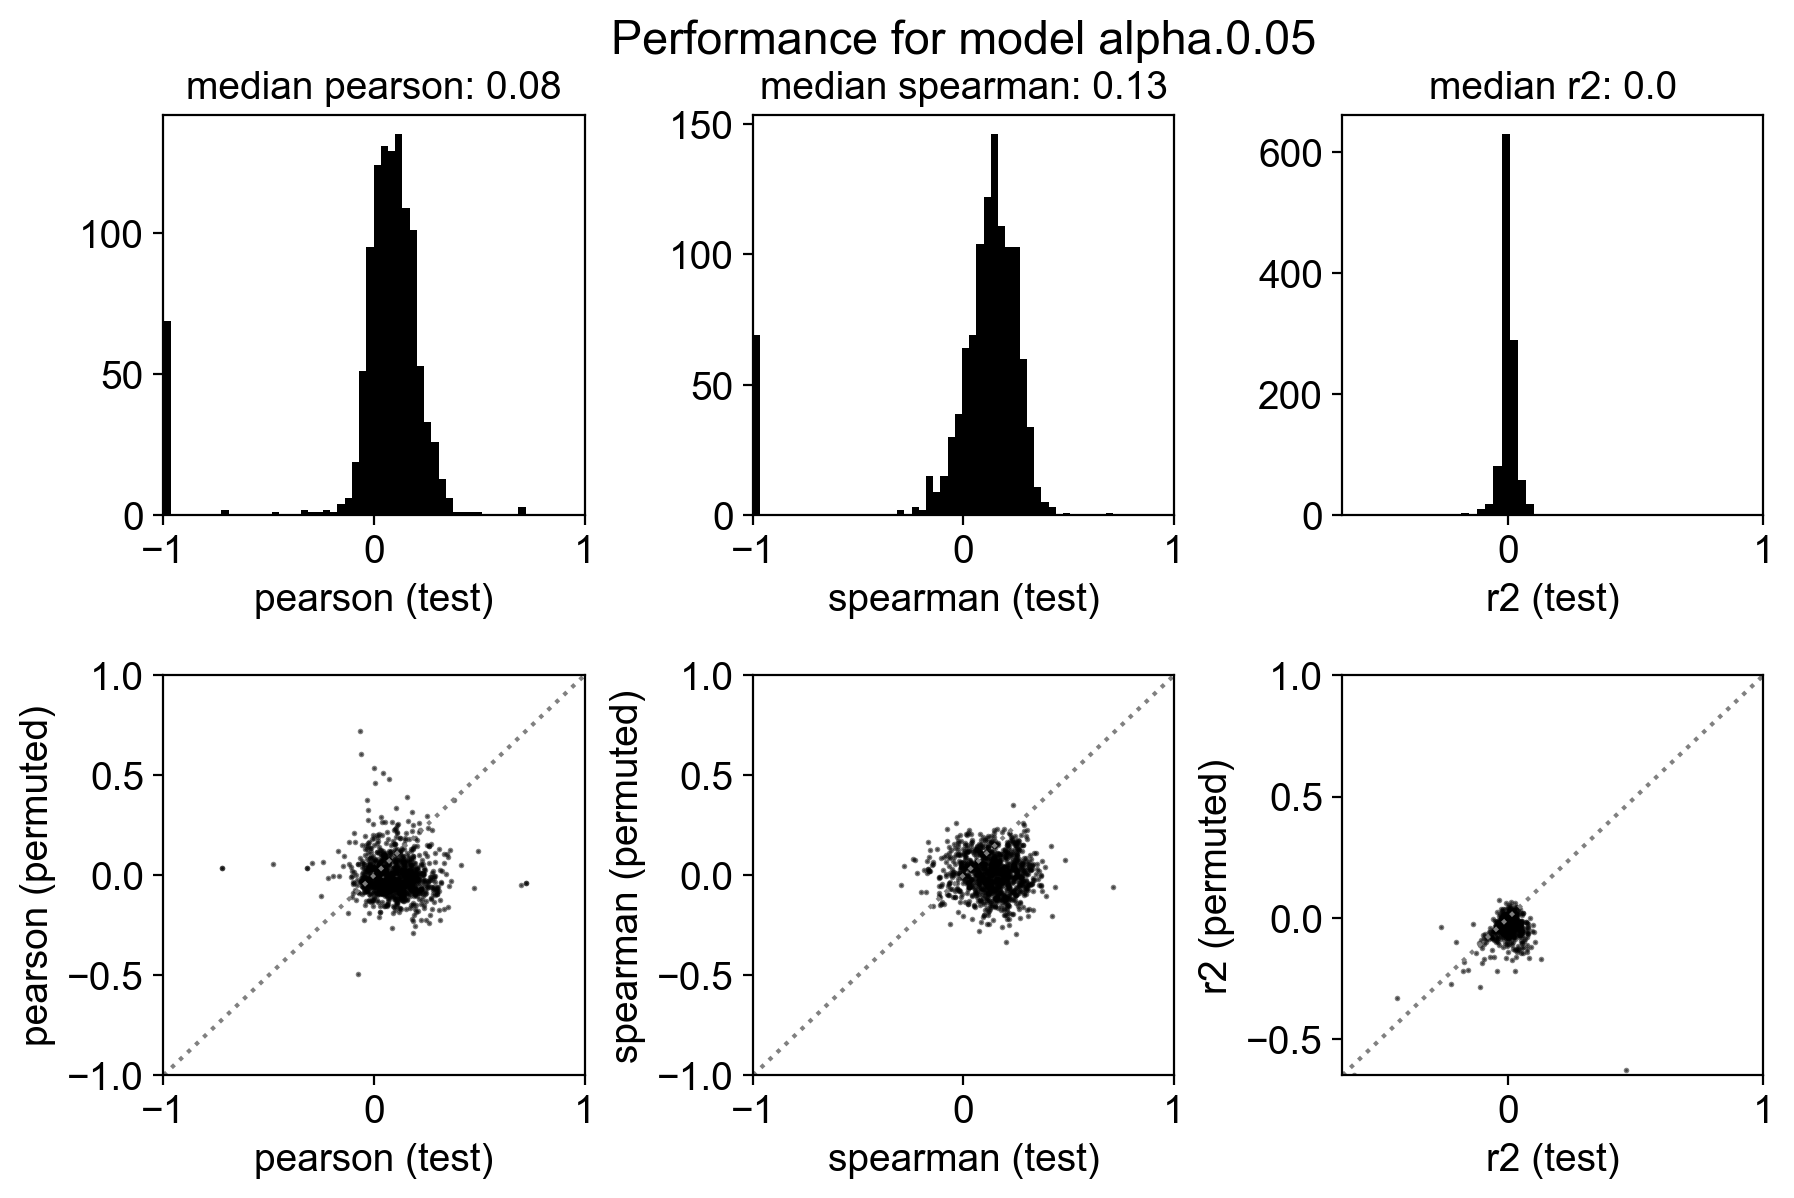

In [241]:
for alpha in [
              0.00005,
              0.0005,
              0.005,
              0.05,
             ]:
    reg=linear_model.ElasticNet(l1_ratio=0.5,alpha=alpha,max_iter=10000,random_state=my_rng)

    modelname='alpha.'+str(alpha)

    perturb.lm.train_lm(adata_small,
        lm=reg,
        include_expression=True,
        y_obs=[],
        model_name=modelname,
        perturbations_list=genes_perturbed,
        covariates_list=covariates, 
        my_rng=np.random.RandomState(1234),
        adjust=False,
         adjust_vars=[],
        copy_adata=False,
        keep_unassigned=False,
         control_names=[],
       use_raw=False)

    perturb.pl.plot_model_performance(adata_small,modelname)

In [242]:
adata_small

AnnData object with n_obs × n_vars = 1044 × 1121
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'BRD9', 'NTC', 'SMARCD2', 'SMARCA4', 'ARID1A', 'PS.alpha.5e-05.train_valid_test', 'PS.alpha.0.0005.train_valid_test', 'PS.alpha.0.005.train_valid_test', 'PS.alpha.0.05.train_valid_test'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PS.alpha.5e-05.X', 'PS.alpha.5e-05.y', 'PS.alpha.5e-05.covariates', 'PS.alpha.5e-05.coef', 'PS.alpha.5e-05.performance', 'PS.alpha.0.0005.X', 'PS.alpha.0.0005.y', 'PS.alpha.0.0005.covariates', 'PS.alpha.0.0005.coef', 'PS.alpha.0.0005.performance', 'PS.alpha.0.005.X', 'PS.alpha.0.005.y', 'PS.alpha.0.005.covariates', 'PS.alpha.0.005.coef', 'PS.alpha.0.005.performance', 'PS.alpha.0.05.X', 'PS.alpha.0.05.y', 'PS.alpha.0.05.covariates', 'PS.alpha.0.05.coef', 'PS.alpha.0.05.performa

In [263]:
adata_small.uns['PS.alpha.0.005.coef']

,BRD9,NTC,SMARCD2,SMARCA4,ARID1A,pct_counts_mt,total_counts
gene,,,,,,,
HOOK3,-0.02320,0.01373,0.05955,-0.00000,-0.00000,-0.00484,0.00004
UGCG,-0.00117,0.02842,0.00481,-0.01308,-0.00000,0.00445,0.00001
GNB5,0.02005,-0.02185,-0.00000,0.00000,0.00000,0.00117,0.00001
ZFP36,0.00000,-0.04920,-0.00123,0.00000,0.01603,-0.00528,0.00001
C9orf72,-0.03422,0.00000,0.02718,0.00704,-0.05251,0.00143,0.00001
...,...,...,...,...,...,...,...
RET,-0.16991,0.00000,0.03821,-0.07107,0.08447,-0.00604,0.00003
GADD45B,-0.00000,-0.00000,0.00517,-0.00000,-0.00000,0.00151,0.00001
KLF2,0.00000,-0.00000,0.00000,-0.00917,0.01873,0.00108,0.00001


In [254]:
adata_small.write('arata2.lm.h5ad')

In [255]:
#linear model in share-seq
arata2=sc.read('arata2.lm.h5ad')
arata2

AnnData object with n_obs × n_vars = 1044 × 1121
    obs: 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'sample', 'ko', 'BRD9', 'NTC', 'SMARCD2', 'SMARCA4', 'ARID1A', 'PS.alpha.5e-05.train_valid_test', 'PS.alpha.0.0005.train_valid_test', 'PS.alpha.0.005.train_valid_test', 'PS.alpha.0.05.train_valid_test'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'PS.alpha.0.0005.X', 'PS.alpha.0.0005.coef', 'PS.alpha.0.0005.covariates', 'PS.alpha.0.0005.performance', 'PS.alpha.0.0005.y', 'PS.alpha.0.005.X', 'PS.alpha.0.005.coef', 'PS.alpha.0.005.covariates', 'PS.alpha.0.005.performance', 'PS.alpha.0.005.y', 'PS.alpha.0.05.X', 'PS.alpha.0.05.coef', 'PS.alpha.0.05.covariates', 'PS.alpha.0.05.performance', 'PS.alpha.0.05.y', 'PS.alpha.5e-05.X', 'PS.alpha.5e-05.coef', 'PS.alpha.5e-05.covariates', 'PS.alpha.5e-05.performance', 'PS.alpha.5e-0

In [271]:
x=arata2.uns['PS.alpha.0.0005.coef']
x

,BRD9,NTC,SMARCD2,SMARCA4,ARID1A,pct_counts_mt,total_counts
gene,,,,,,,
HOOK3,-0.03325,0.03152,0.08488,-0.00155,-0.00000,-0.00394,0.00004
UGCG,-0.01257,0.04567,0.02776,-0.01849,-0.00000,0.00575,0.00001
GNB5,0.03165,-0.03809,-0.01879,0.00000,0.00291,0.00027,0.00001
ZFP36,0.00000,-0.07082,-0.02706,0.00000,0.02522,-0.00727,0.00001
C9orf72,-0.05297,0.00000,0.04330,0.01135,-0.06950,0.00261,0.00001
...,...,...,...,...,...,...,...
RET,-0.18693,0.00000,0.05710,-0.07952,0.09718,-0.00672,0.00003
GADD45B,-0.00000,0.00037,0.02611,-0.00076,-0.00099,0.00196,0.00001
KLF2,0.00766,-0.00683,-0.00000,-0.01695,0.03094,0.00037,0.00001


In [272]:
common_genes=list(set(list(x.index)).intersection(set(list(y.index))))
print(len(common_genes))

x=x.loc[common_genes,:]
y=y.loc[common_genes,:]

1121


In [273]:
gs1=['NTC',
     'ARID1A','SMARCA4','SMARCD2','BRD9']
gs2=['BCL7A', 'SMARCD2', 'ACTL6B', 'SMARCE1', 'DPF3', 
    'SMARCC2', 'PBRM1',  'SS18L', 'BCL7C', 'SMARCD3',
     'ARID2', 'DPF1', 'BRD9', 'ARID1A', 'GLTSCR1L', 'SMARCA4', 
     'ACTL6A',  'DPF2', 'SMARCB1', 'SMARCD1', 'PHF10', 'GLTSCR1', 
    'SMARCA2', 'ARID1B', 'BCL7B', 'SMARCC1','BRD7']
corr=pd.DataFrame(0,index=gs1,columns=gs2)
for g1 in gs1:
    for g2 in gs2:
        from scipy.stats import spearmanr
        v=spearmanr(x[g1],y[g2])[0]
        corr.loc[g1,g2]=v

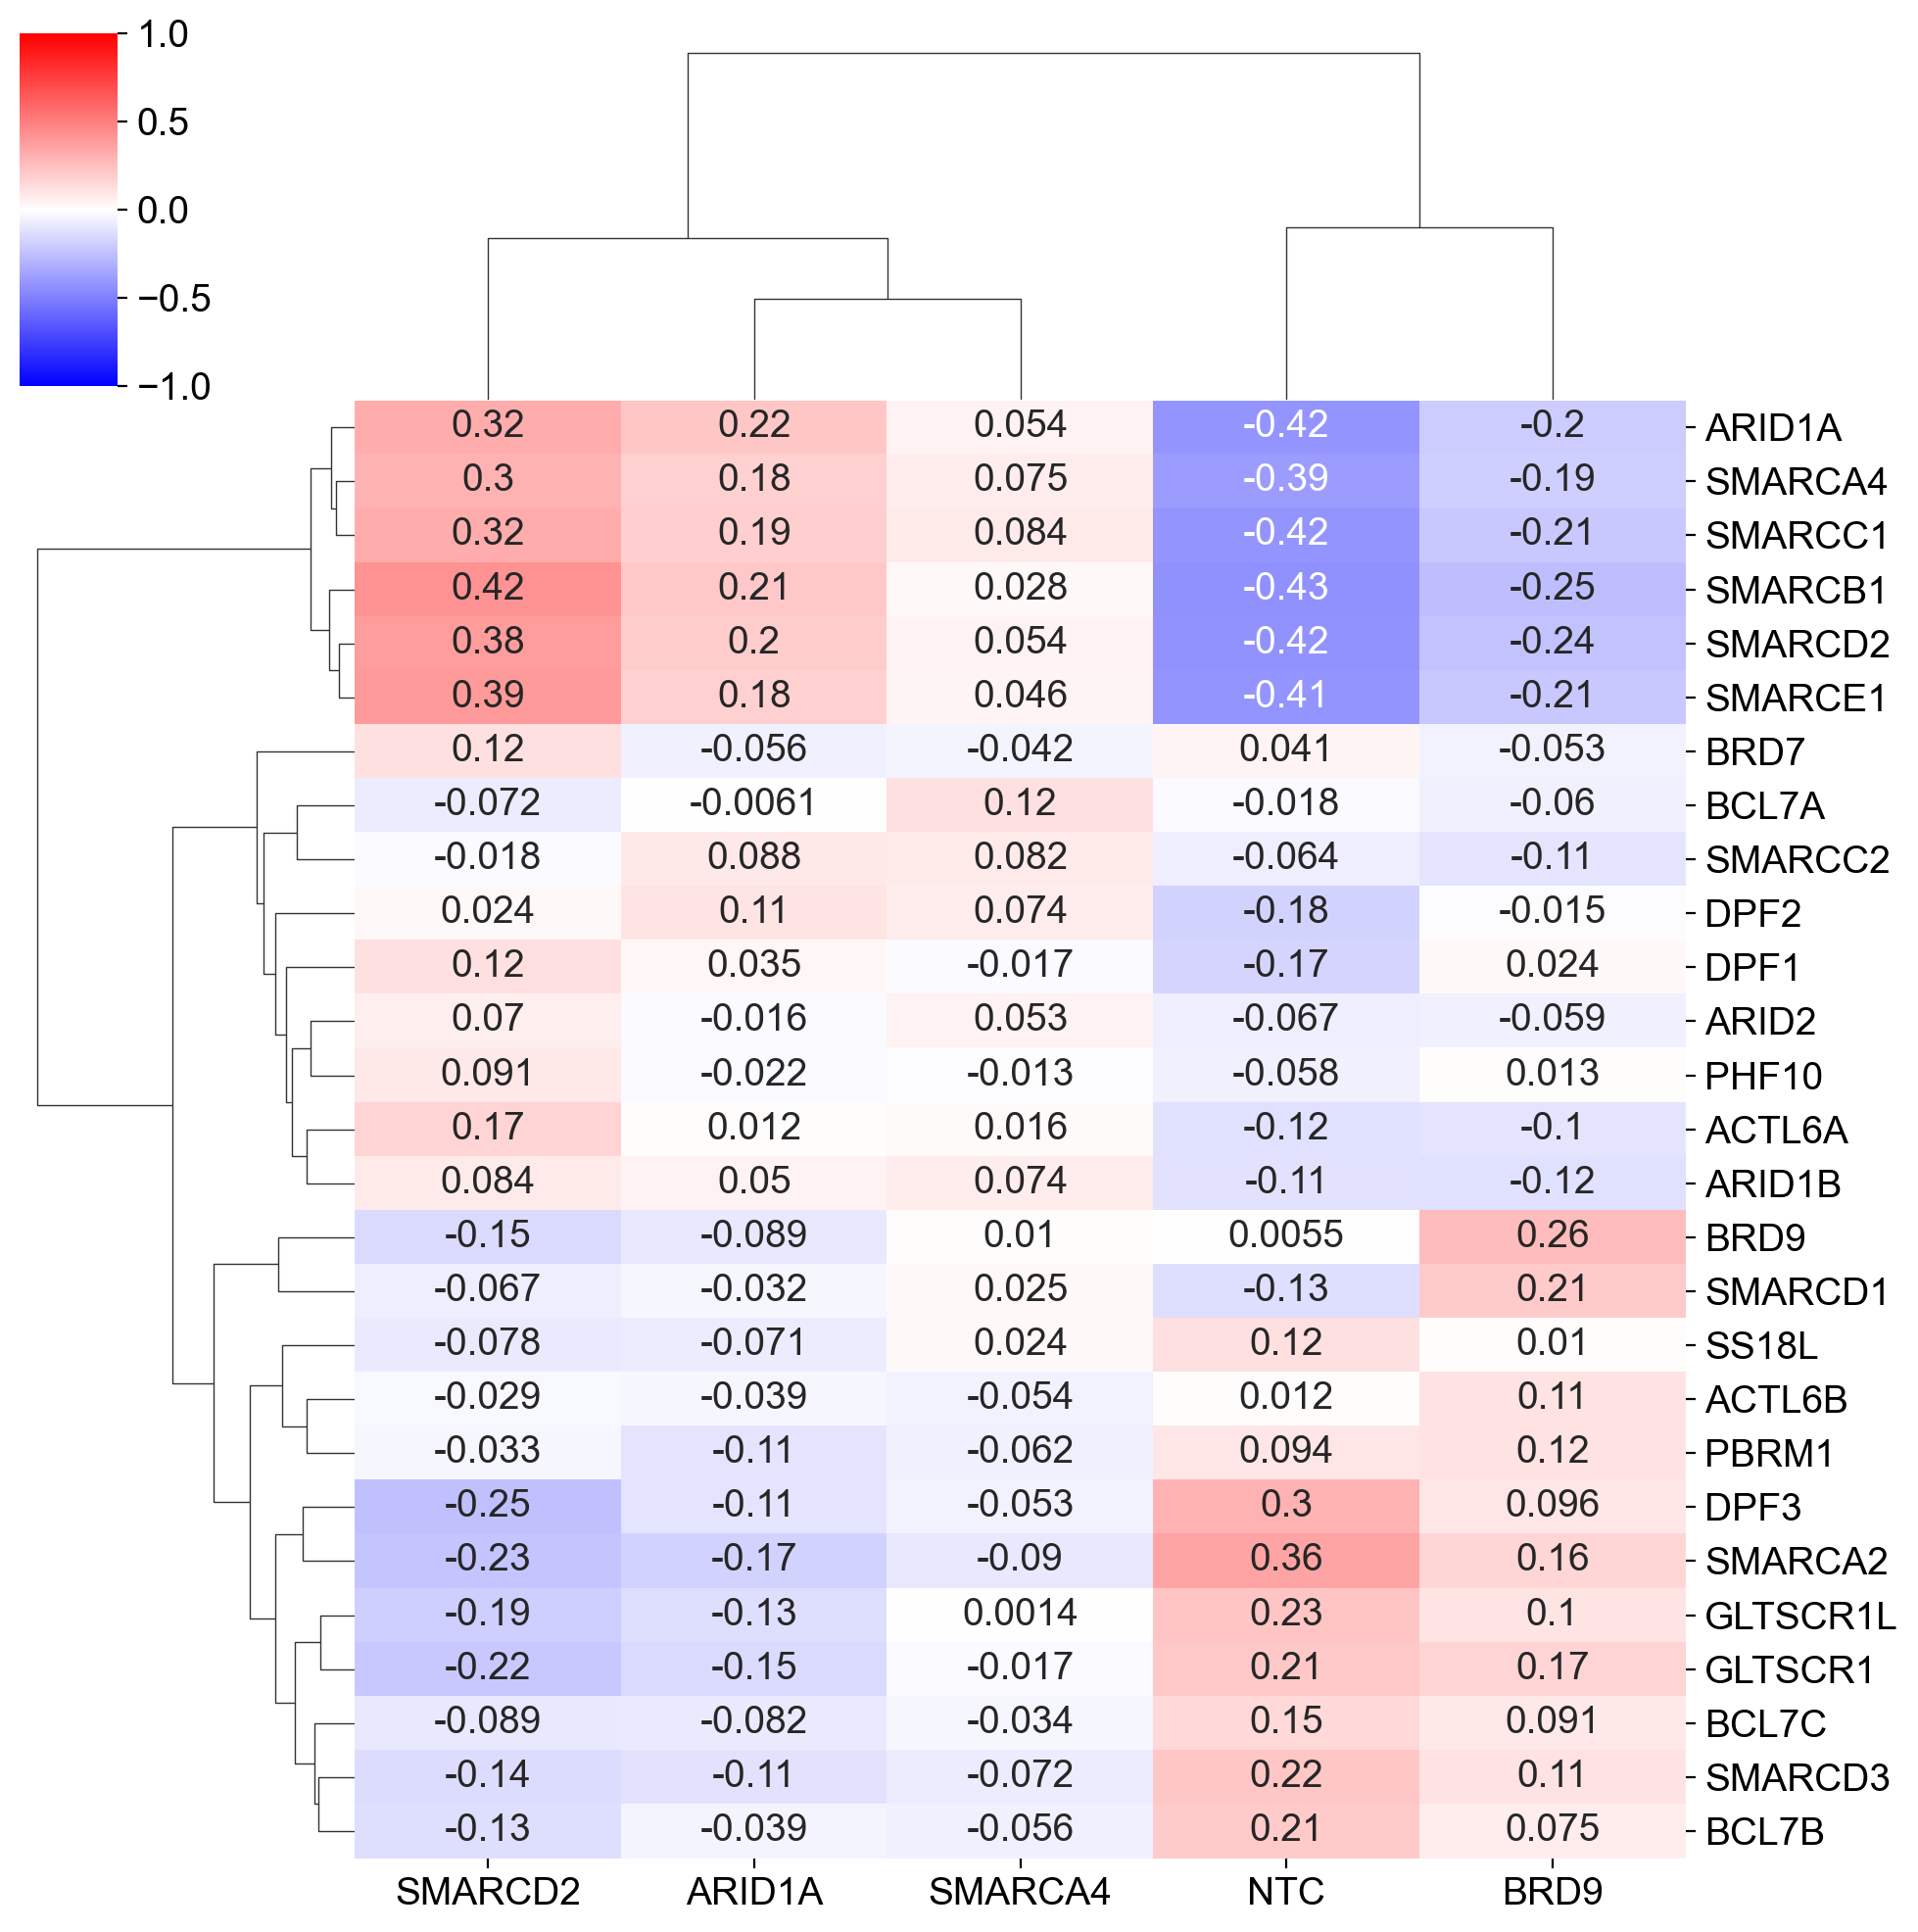

In [274]:
import seaborn as sns
sns.clustermap(corr.T,vmin=-1,vmax=1,cmap='bwr',yticklabels=True,annot=True)

In [275]:
cbaf=['ARID1A']
core=['SMARCA4','SMARCE1','SMARCB1','SMARCC1','SMARCD2']
nc=['BRD9','SMARCD1']
pbaf=['ARID2','BRD7','PBRM1']
leftovers=list(set(corr.columns).difference(set(['ARID1A',
                                                'SMARCA4','SMARCE1','SMARCB1','SMARCC1','SMARCD2',
                                                'BRD9','SMARCD1',
                                                'ARID2','BRD7','PBRM1'])))
ordered_sg=['ARID1A',
                                                'SMARCA4','SMARCE1','SMARCB1','SMARCC1','SMARCD2',
                                                'BRD9','SMARCD1',
                                                'ARID2','BRD7','PBRM1']
for leftover in leftovers:
    ordered_sg.append(leftover)

corrdata=pd.DataFrame(columns=['perturbation','single_guide','correlation','color'])
colors={}
for c in ordered_sg:
    if c in cbaf:
        colors[c]='blue'
    elif c in core:
        colors[c]='lightblue'
    elif c in nc:
        colors[c]='green'
    elif c in pbaf:
        colors[c]='red'
    else:
        colors[c]='lightgray'
    corrdata_here=pd.DataFrame({'perturbation':corr.index,
                               'single_guide':c,
                               'correlation':corr.loc[:,c],
                               'color':colors[c]})
    corrdata=pd.concat([corrdata,corrdata_here],axis=0)

In [276]:
FIGS

'/Users/ursuo/Documents/research/baf/data/2021-06-17/share/2022-11-22/'

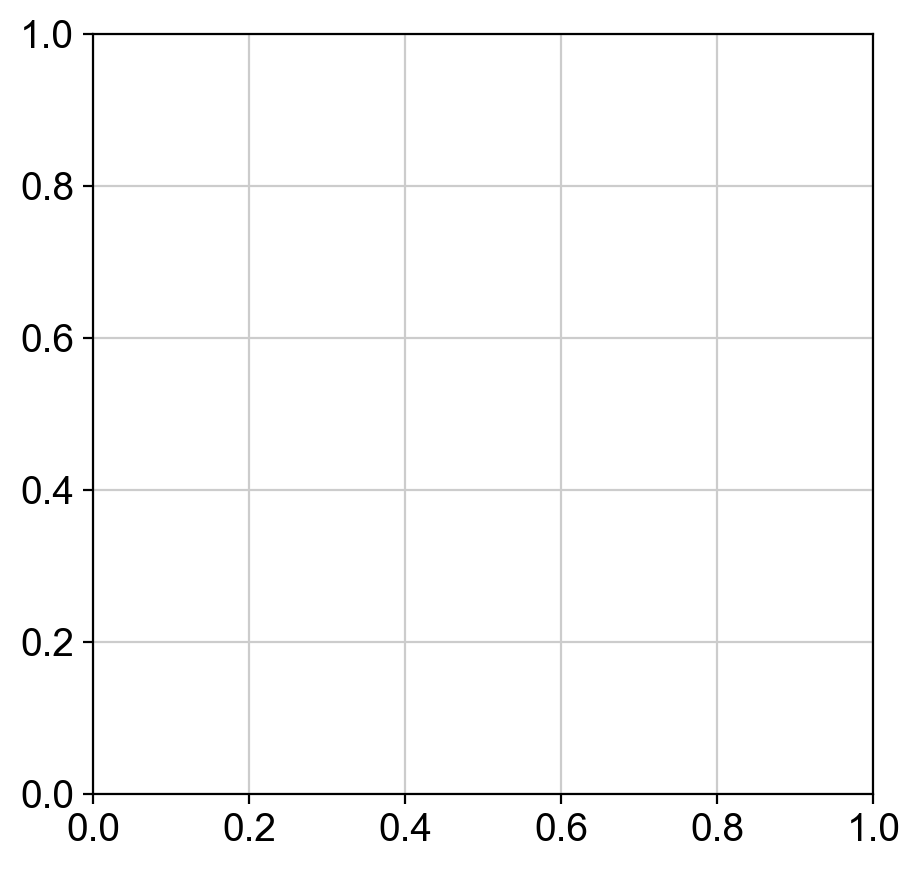

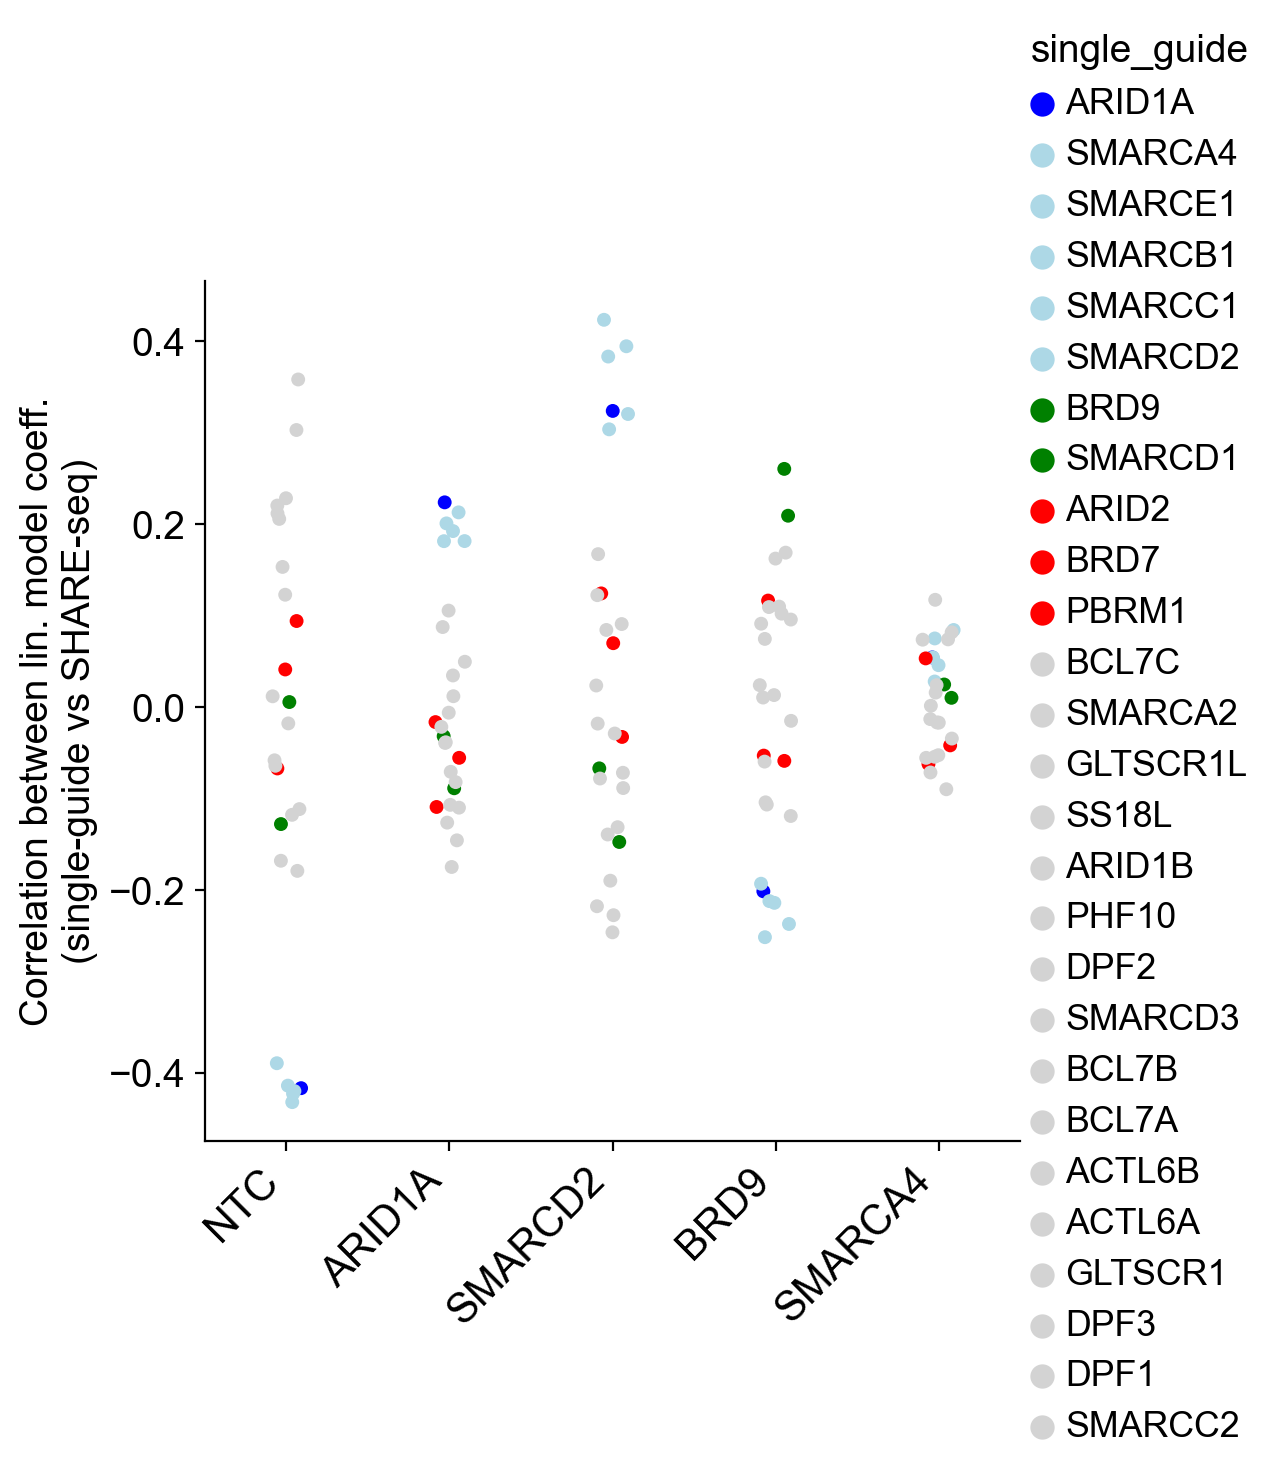

In [277]:
fig,plots=plt.subplots(1)
fig.set_size_inches(5,5)

g=sns.catplot(data=corrdata,x='perturbation',y='correlation',hue='single_guide',
            order=['NTC',
                   'ARID1A','SMARCD2','BRD9','SMARCA4'],#ax=plots,
           palette=colors,
           )
plots = g.axes[0,0]
plots.set_ylabel('Correlation between lin. model coeff.\n(single-guide vs SHARE-seq)')
plots.set_xlabel('')
#plots.set_ylim(-0.5,0.5)
plots.grid(False)
a=plots.set_xticklabels(plots.get_xticklabels(),rotation=45,ha='right',fontsize=15)
plt.savefig(FIGS+'/share_vs_singleguide_linmodel_corr.pdf',bbox_inches = "tight") 
plt.savefig(FIGS+'/share_vs_singleguide_linmodel_corr.png',bbox_inches = "tight")